# **Análisis Exploratorio de Datos**

## **Carga y Exploración Inicial de los Datos**

En esta sección, se realiza una carga inicial del dataset del Home Mortgage Disclosure Act (HMDA) filtrado para el estado de Texas, centrado en solicitudes de préstamos para la compra de viviendas. La exploración inicial de los datos implica la visualización de las primeras filas del dataset, un resumen estadístico de las variables numéricas, y la obtención de la dimensión del conjunto de datos para entender su tamaño y estructura. Además, se analizará una tabla de descripción de variables, identificando aquellas que son redundantes o no relevantes para el análisis posterior. 

In [335]:
# Importación de librerías necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno
import plotly.express as px
from scipy.stats import chi2_contingency, mannwhitneyu, kstest, ttest_ind
from plotly.offline import plot
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [336]:
# Carga y exploración inicial del dataset
Data = pd.read_csv('HMDA.csv')
display(Data.head())
print(f"El dataset tiene {Data.shape[0]} observaciones y {Data.shape[1]} variables.")

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,254900FBWEZ3YUPOBN33,46340,TX,48423.0,4.842300e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5655,57.14,85600,82.23,1181,2284,72
1,2023,254900FBWEZ3YUPOBN33,26420,TX,48201.0,4.820131e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,2790,84.80,94100,135.82,672,857,56
2,2023,254900FBWEZ3YUPOBN33,28660,TX,48027.0,4.802702e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3169,82.27,76500,41.58,601,1067,62
3,2023,254900FBWEZ3YUPOBN33,26420,TX,48201.0,4.820153e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3514,98.24,94100,42.23,705,1113,49
4,2023,254900FBWEZ3YUPOBN33,28660,TX,48027.0,4.802702e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,2926,59.64,76500,65.80,545,949,32


El dataset tiene 443656 observaciones y 99 variables.


## **Eliminación de variables**

Para optimizar el análisis de los datos de préstamos hipotecarios, se procederá a eliminar ciertas variables del dataset que no son relevantes o que ya están resumidas en otras variables más útiles. Muchas de estas columnas detallan múltiples categorías de etnicidad y raza del solicitante y co-solicitante, como *applicant_ethnicity-1* a *applicant_ethnicity-5* y *co-applicant_race-1* a *co-applicant_race-5*, pero estas pueden ser reemplazadas por las variables derivadas *derived_ethnicity* y *derived_race*, que ya sintetizan esta información. Otras variables han sido incluidas solo como referencia de contexto del sector, como *activity_year*, *state_code* y *census_tract*, sin aportar directamente al análisis de las decisiones de préstamo. Por ello, estas columnas serán eliminadas para simplificar el dataset y enfocarnos en las variables de mayor relevancia para nuestro estudio. 

In [337]:
Data = Data.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 
                  'applicant_ethnicity-5', 'co-applicant_ethnicity-1', 'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3',
                  'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 
                  'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'co-applicant_race-1', 'co-applicant_race-2',
                  'co-applicant_race-3', 'co-applicant_race-4', 'co-applicant_race-5', 'denial_reason-1', 'denial_reason-2', 
                  'denial_reason-3', 'denial_reason-4', 'activity_year', 'lei', 'derived_msa-md', 
                  'state_code', 'census_tract', 'loan_purpose', 'applicant_ethnicity_observed', 'co-applicant_ethnicity_observed',
                  'co-applicant_race_observed', 'co-applicant_sex_observed', 'applicant_age_above_62', 'co-applicant_age_above_62', 
                  'interest_rate', 'tract_population', 'tract_minority_population_percent', 
                  'tract_to_msa_income_percentage', 'tract_owner_occupied_units', 'tract_one_to_four_family_homes', 'tract_median_age_of_housing_units',
                  'rate_spread', 'other_nonamortizing_features'], axis=1)

print(f"El dataset tiene {Data.shape[0]} observaciones y {Data.shape[1]} variables.")

El dataset tiene 443656 observaciones y 54 variables.


### **Base de datos luego de la eliminación**

In [338]:
display(Data.head())

,county_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,...,applicant_age,co-applicant_age,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,ffiec_msa_md_median_family_income
0,48423.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,8888,8888,1,1,6,NaN,NaN,NaN,NaN,85600
1,48201.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,5,2,...,8888,8888,1,1,6,NaN,NaN,NaN,NaN,94100
2,48027.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,8888,8888,1,1,6,NaN,NaN,NaN,NaN,76500
3,48201.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,5,2,...,8888,8888,1,1,6,NaN,NaN,NaN,NaN,94100
4,48027.0,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,5,2,...,8888,8888,1,1,6,NaN,NaN,NaN,NaN,76500


## **Resumen de Variables Cuantitativas y Cualitativas**

A continuación, se presenta un resumen estadístico de las variables del dataset, tanto cuantitativas como cualitativas, que proporciona una visión general de su distribución y características. Para las variables cuantitativas, se incluye información como la media, mediana, desviación estándar, valores mínimos y máximos. Para las variables cualitativas, se muestra la frecuencia de cada categoría, lo que permite identificar patrones en los datos demográficos y las decisiones de préstamos. Este "summary" es fundamental para entender la estructura de los datos y guiar los próximos pasos del análisis.

### **Resumen de variables cuantitativas**

In [339]:
display(Data.describe())

,county_code,action_taken,purchaser_type,preapproval,loan_type,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,...,co-applicant_sex,applicant_sex_observed,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,ffiec_msa_md_median_family_income
count,439689.000000,443656.000000,443656.000000,443656.000000,443656.000000,443656.000000,443656.000000,443656.000000,443656.000000,4.436560e+05,...,443656.000000,443656.000000,443656.000000,443656.000000,443656.000000,31801.000000,5965.000000,2816.000000,2329.000000,443656.000000
mean,48227.779874,1.398119,13.510069,1.962575,1.433856,1.024418,26.119164,26.111701,25.671723,3.311607e+05,...,3.533312,2.047079,25.318447,25.212850,26.906189,1.877111,2.611232,1.289773,1.296264,92527.359260
std,148.026690,0.798587,25.906443,0.189802,0.691672,0.154342,161.761556,161.762692,160.451510,7.935482e+05,...,1.657160,0.256459,161.829966,161.845555,162.153061,1.157010,1.755964,0.568425,0.577937,17612.346836
min,48001.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,48113.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.850000e+05,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84300.000000
50%,48201.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.750000e+05,...,5.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,94100.000000
75%,48349.000000,1.000000,6.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.850000e+05,...,5.000000,2.000000,1.000000,1.000000,6.000000,2.000000,5.000000,1.000000,1.000000,105600.000000
max,48507.000000,3.000000,72.000000,2.000000,4.000000,2.000000,1111.000000,1111.000000,1111.000000,1.043550e+08,...,6.000000,3.000000,1111.000000,1111.000000,1111.000000,7.000000,5.000000,3.000000,3.000000,122300.000000


En esta sección, se presenta un resumen de las variables cuantitativas del dataset, mostrando estadísticas como la media, mediana, desviación estándar, entre otras. Sin embargo, es importante notar que varias de estas variables han sido inicialmente categorizadas como numéricas, aunque en realidad representan categorías codificadas con números. Por ejemplo, variables como action_taken, purchaser_type, preapproval, y otras contienen códigos numéricos que indican diferentes estados o tipos en lugar de valores cuantitativos reales. Para abordar este problema y asegurar un análisis correcto, se procederá a mapear estos números a sus respectivas etiquetas categóricas, transformándolas en variables de tipo categórico que reflejen adecuadamente su naturaleza cualitativa.

In [340]:
# Mapping de las categorías

# Codificación del código de condado
Data['county_code'] = Data['county_code'].astype(str)

# Variable "action_taken" (decisión)
ActionTakenMapping = {1: 'Loan Originated', 2: 'Application Approved but Not Accepted', 3: 'Application Denied', 
                        4: 'Application Withdrawn by Applicant', 5: 'File Closed for Incompleteness', 
                        6: 'Purchased Loan', 7: 'Preapproval Request Denied', 8: 'Preapproval Request Approved but Not Accepted'}

Data['action_taken'] = Data['action_taken'].map(ActionTakenMapping).astype('category')

# Variable "purchaser_type" 
PurchaserTypeMapping = {0: 'Not Applicable', 1: 'Fannie Mae', 2: 'Ginnie Mae', 3: 'Freddie Mac', 
                          4: 'Farmer Mac', 5: 'Private Securitization', 6: 'Commercial Bank', 
                          7: 'Credit Union', 8: 'Affiliate Institution', 9: 'Other'}
Data['purchaser_type'] = Data['purchaser_type'].map(PurchaserTypeMapping).astype('category')

# Variable "preapproval"
PreapprovalMapping = {1: 'Preapproval Requested', 2: 'Preapproval Not Requested', 3: 'Not Applicable'}
Data['preapproval'] = Data['preapproval'].map(PreapprovalMapping).astype('category')

# Variable "loan_type"
LoanTypeMapping = {1: 'Conventional', 2: 'FHA', 3: 'VA', 4: 'USDA'}
Data['loan_type'] = Data['loan_type'].map(LoanTypeMapping).astype('category')

# Variable "lien_status"
LienStatusMapping = {1: 'First Liena', 2: 'Subordinate Lien'}
Data['lien_status'] = Data['lien_status'].map(LienStatusMapping).astype('category')

# Variable "reverse_mortgage"
ReverseMortgageMapping = {1: 'Reverse Mortgage', 2: 'Not Reverse Mortgage', 1111: 'Exempt'}
Data['reverse_mortgage'] = Data['reverse_mortgage'].map(ReverseMortgageMapping).astype('category')

# Varible "open-end_line_of_credit"
OpenEndLineMapping = {1: 'Open-End', 2: 'Not Open-End', 1111: 'Exempt'}
Data['open-end_line_of_credit'] = Data['open-end_line_of_credit'].map(OpenEndLineMapping).astype('category')

# Variable "business_or_commercial_purpose"
BusinessOrCommercialMapping = {1: 'Primarily Bussiness or Commercial Purpose', 2: 'Not Primarily Bussiness or Commercial Purpose', 1111: 'Exempt'}
Data['business_or_commercial_purpose'] = Data['business_or_commercial_purpose'].map(BusinessOrCommercialMapping).astype('category')

# Variable "hoepa_status"
HoepaStatusMapping = {1: 'High-cost Mortgage', 2: 'Not High-cost Mortgage', 3: 'Not Applicable'}
Data['hoepa_status'] = Data['hoepa_status'].map(HoepaStatusMapping).astype('category')

# Variable "negative_amortization
NegAmortizationMapping = {1: 'Negative Amortization', 2: 'No Negative Amortization', 1111: 'Exempt'}
Data['negative_amortization'] = Data['negative_amortization'].map(NegAmortizationMapping).astype('category')

# Variable "interest_only_payment"
InterestPaymentMapping = {1: 'Interest-only Payments', 2: 'No Interest-only Payments', 1111: 'Exempt'}
Data['interest_only_payment'] = Data['interest_only_payment'].map(InterestPaymentMapping).astype('category')

# Variable "balloon_payment"
BalloonPaymentMapping = {1: 'Balloon Payment', 2: 'No Balloon Payment', 1111: 'Exempt'}
Data['balloon_payment'] = Data['balloon_payment'].map(BalloonPaymentMapping).astype('category')

# Variable "construction_method"
ConstructionMethodMapping = {1: 'Site-build', 2: 'Manufactured Home'}
Data['construction_method'] = Data['construction_method'].map(ConstructionMethodMapping).astype('category')

# Variable "occupancy_type"
OccupancyTypeMapping = {1: 'Principal Residence', 2: 'Second Residence', 3: 'Investment Property'}
Data['occupancy_type'] = Data['occupancy_type'].map(OccupancyTypeMapping).astype('category')

# Variable "manufactured_home_secured_property_type"
MhsptMapping = {1: 'Manufactured Home and Land', 2: 'Manufactured Home and not Land', 3: 'Not Applicable', 1111: 'Exempt'}
Data['manufactured_home_secured_property_type'] = Data['manufactured_home_secured_property_type'].map(MhsptMapping).astype('category')

# Variable "manufactured_home_land_property_interest"
MhlpiMapping = {1: 'Direct Ownership', 2: 'Indirect Ownership', 3: 'Paid Leasehold', 4: 'Unpaid Leasehold', 5: 'Not Applicable', 1111: 'Exempt'}
Data['manufactured_home_land_property_interest'] = Data['manufactured_home_land_property_interest'].map(MhlpiMapping).astype('category')

# Variable "applicant_credit_score_type"
AppCreditScoreMapping = {1: 'Equifax Beacon 5.0', 2: 'Experian Fair Isaac', 3: 'FICO Risk Score Classic 04', 4: 'FICO Risk Score Classic 98', 5: 'VantageScore 2.0', 
                         6: 'VantageScore 3.0', 7: 'More than one credit scoring model', 8: 'Other credit scoring model', 9: 'Not applicable', 1111: 'Exempt'}
Data['applicant_credit_score_type'] = Data['applicant_credit_score_type'].map(AppCreditScoreMapping).astype('category')

# Variable "co-applicant_credit_score_type"
CoAppCreditScoreMapping = {1: 'Equifax Beacon 5.0', 2: 'Experian Fair Isaac', 3: 'FICO Risk Score Classic 04', 4: 'FICO Risk Score Classic 98', 5: 'VantageScore 2.0',
                           6: 'VantageScore 3.0', 7: 'More than one credit scoring model', 8: 'Other credit scoring model', 9: 'Not applicable', 10: 'No co-applicant', 
                           1111: 'Exempt'}
Data['co-applicant_credit_score_type'] = Data['co-applicant_credit_score_type'].map(CoAppCreditScoreMapping).astype('category')

# Variable "applicant_race_observed"
AppRaceObMapping = {1: 'Collected on the basis of visual observation or surname', 2: 'Not collected on the basis of visual observation or surname', 3: 'Not applicable'}
Data['applicant_race_observed'] = Data['applicant_race_observed'].map(AppRaceObMapping).astype('category')

# Variable "applicant_sex"
CoAppSexMapping = {1: 'Male', 2: 'Female', 3: 'Not provided', 4: 'Not applicable', 6: 'Applicant selected both male and female'}
Data['applicant_sex'] = Data['applicant_sex'].map(CoAppSexMapping).astype('category')

# Variable "co-applicant_sex"
CoAppSexMapping = {1: 'Male', 2: 'Female', 3: 'Not provided', 4: 'Not applicable', 5: 'No co-applicant', 6: 'Applicant selected both male and female'}
Data['co-applicant_sex'] = Data['co-applicant_sex'].map(CoAppSexMapping).astype('category')

# Variable "applicant_sex_observed"
AppSexObsMapping = {1: 'Collected on the basis of visual observation or surname', 2: 'Not collected on the basis of visual observation or surname', 3: 'Not applicable'}
Data['applicant_sex_observed'] = Data['applicant_sex_observed'].map(AppSexObsMapping).astype('category')

# Variable "submission_of_application"
SubApplicationMapping = {1: 'Submitted directly to your institution', 2:'Not submitted directly to your institution', 
                         3: 'Not applicable', 1111: 'Exempt'}
Data['submission_of_application'] = Data['submission_of_application'].map(SubApplicationMapping).astype('category')

# Variable "initially_payable_to_institution"
IPayInstMapping = {1: 'initially_payable_to_institution', 2: 'Not initially payable to your institution', 3: 'Not applicable', 1111: 'Exempt'}
Data['initially_payable_to_institution'] = Data['initially_payable_to_institution'].map(IPayInstMapping).astype('category')

# Variables aus, al tener la opción de varios sistemas automatizados, se cambia a una codificación donde un 1 representa la presencia de dicho sistema automatizado.
ausMapping = {1: 'DU', 2: 'LP', 3: 'TOTAL', 
               4: 'GUS', 5: 'Other', 6: 'NA', 7: 'IPS', 1111: 'NA'}
Data['aus-1'] = Data['aus-1'].map(ausMapping).astype('category')
Data['aus-2'] = Data['aus-2'].map(ausMapping).astype('category')
Data['aus-3'] = Data['aus-3'].map(ausMapping).astype('category')
Data['aus-4'] = Data['aus-4'].map(ausMapping).astype('category')
Data['aus-5'] = Data['aus-5'].map(ausMapping).astype('category')

aus_categories = set(ausMapping.values()) - {'NA'}
for category in aus_categories:
    Data[f'aus_{category}'] = Data[[f'aus-{i}' for i in range(1, 6)]].apply(lambda x: int(category in x.values), axis=1)

Data = Data.drop(columns=[f'aus-{i}' for i in range(1, 6)])

# Variables definidas como categóricas, categóricas. 
Data['county_code'] = Data['county_code'].astype('category')
Data['conforming_loan_limit'] = Data['conforming_loan_limit'].astype('category')
Data['derived_dwelling_category'] = Data['derived_dwelling_category'].astype('category')
Data['derived_ethnicity'] = Data['derived_ethnicity'].astype('category')
Data['derived_race'] = Data['derived_race'].astype('category')
Data['derived_sex'] = Data['derived_sex'].astype('category')

# Variables definidas como númericas, numéricas. 
Data['loan_amount'] = pd.to_numeric(Data['loan_amount'], errors='coerce')
Data['total_loan_costs'] = pd.to_numeric(Data['total_loan_costs'], errors='coerce')
Data['total_points_and_fees'] = pd.to_numeric(Data['total_points_and_fees'], errors='coerce')
Data['origination_charges'] = pd.to_numeric(Data['origination_charges'], errors='coerce')
Data['discount_points'] = pd.to_numeric(Data['discount_points'], errors='coerce')
Data['lender_credits'] = pd.to_numeric(Data['lender_credits'], errors='coerce')
Data['loan_term'] = pd.to_numeric(Data['loan_term'], errors='coerce')
Data['intro_rate_period'] = pd.to_numeric(Data['intro_rate_period'], errors='coerce')
Data['property_value'] = pd.to_numeric(Data['property_value'], errors='coerce')
Data['loan_to_value_ratio'] = pd.to_numeric(Data['property_value'], errors='coerce')
Data['income'] = pd.to_numeric(Data['income'], errors='coerce')
Data['ffiec_msa_md_median_family_income'] = pd.to_numeric(Data['ffiec_msa_md_median_family_income'], errors='coerce')

def CategorizarRatio(val):
    try:
        rango = val.split('-')
        Average = (float(rango[0].replace('%', '')) + float(rango[1].replace('%', ''))) / 2
        if Average < 20:
            return 'Bajo'
        elif 20 <= Average < 35:
            return 'Medio-Bajo'
        elif 35 <= Average < 50:
            return 'Medio'
        elif 50 <= Average < 65:
            return 'Medio-Alto'
        else:
            return 'Alto'
    except:
        return 'Desconocido'

Data['debt_to_income_ratio_cat'] = Data['debt_to_income_ratio'].apply(CategorizarRatio)
print(Data.dtypes)

county_code                                 category
conforming_loan_limit                       category
derived_loan_product_type                     object
derived_dwelling_category                   category
derived_ethnicity                           category
derived_race                                category
derived_sex                                 category
action_taken                                category
purchaser_type                              category
preapproval                                 category
loan_type                                   category
lien_status                                 category
reverse_mortgage                            category
open-end_line_of_credit                     category
business_or_commercial_purpose              category
loan_amount                                  float64
loan_to_value_ratio                          float64
hoepa_status                                category
total_loan_costs                             f

### **Resumen de variables cualitativas**

In [341]:
CategoricalVar = Data.select_dtypes(include=['category', 'object']).columns
summary_CatVar = {}

for col in CategoricalVar:
    counts = Data[col].value_counts()
    percentages = Data[col].value_counts(normalize=True) * 100
    SummaryCatVar = pd.DataFrame({'Frecuencia': counts, 'Porcentaje (%)': percentages})
    
    summary_CatVar[col] = SummaryCatVar

#for col, SummaryCatVar in summary_CatVar.items():
#    print(f"Resumen para la variable '{col}':")
#    display(SummaryCatVar)
#    print("\n")

## **Análisis de Préstamos Aprobados y Rechazados por Sexo, Raza y Edad**

Para entender mejor la distribución de los préstamos hipotecarios aprobados y rechazados, se han aplicado filtros específicos al dataset para identificar el número de préstamos aprobados *'(Loan originated = 1)'* y rechazados *'(Application denied = 3)'*. A partir de estos grupos, se han analizado las distribuciones por sexo, raza y edad, utilizando las variables derivadas correspondientes. Este análisis inicial permite observar cómo se comportan las decisiones de préstamos en función de estas características demográficas, proporcionando una base sólida para interpretar posibles patrones y tendencias dentro de los datos.

In [342]:
# Filtro 1: Préstamos aprobados 
Approved = Data.query("action_taken == 'Loan Originated'")

# Filtro 2: Préstamos rechazados 
Denied = Data.query("action_taken == 'Application Denied'")

# Verifica que los filtros no estén vacíos
print(f"Total de préstamos aprobados: {len(Approved)}")
display(f"Total de préstamos rechazados: {len(Denied)}")

# Filtra Aprobados por Sexo
ApprovedSex = Approved['derived_sex'].value_counts()
print("\nCantidad de préstamos aprobados por sexo:")
display(ApprovedSex)

# Filtra Aprobados por Raza
ApprovedRace = Approved['derived_race'].value_counts()
print("\nCantidad de préstamos aprobados por raza:")
display(ApprovedRace)

# Filtra Aprobados por Edad 
ApprovedAge = Approved['applicant_age'].value_counts().sort_index()
print("\nCantidad de préstamos aprobados por edad:")
display(ApprovedAge)

# Filtra Rechazados por Sexo
DeniedSex = Denied['derived_sex'].value_counts()
print("\nCantidad de préstamos rechazados por sexo:")
display(DeniedSex)

# Filtra Rechazados por Raza
DeniedRace = Denied['derived_race'].value_counts()
print("\nCantidad de préstamos rechazados por raza:")
display(DeniedRace)

# Filtra Rechazados por Edad 
DeniedAge = Denied['applicant_age'].value_counts().sort_index()
print("\nCantidad de préstamos rechazados por edad:")
display(DeniedAge)

Total de préstamos aprobados: 355342


'Total de préstamos rechazados: 88314'


Cantidad de préstamos aprobados por sexo:


derived_sex
Joint                142585
Male                 120566
Female                67208
Sex Not Available     24983
Name: count, dtype: int64


Cantidad de préstamos aprobados por raza:


derived_race
White                                        209680
Race Not Available                            60897
Asian                                         40349
Black or African American                     29581
Joint                                         10428
American Indian or Alaska Native               2837
2 or more minority races                        914
Native Hawaiian or Other Pacific Islander       570
Free Form Text Only                              86
Name: count, dtype: int64


Cantidad de préstamos aprobados por edad:


applicant_age
25-34    113857
35-44    100089
45-54     60900
55-64     34386
65-74     14585
8888       7774
<25       19663
>74        4088
Name: count, dtype: int64


Cantidad de préstamos rechazados por sexo:


derived_sex
Male                 31836
Joint                27022
Female               23685
Sex Not Available     5771
Name: count, dtype: int64


Cantidad de préstamos rechazados por raza:


derived_race
White                                        48867
Race Not Available                           20482
Black or African American                    10248
Asian                                         5250
Joint                                         1821
American Indian or Alaska Native              1103
2 or more minority races                       306
Native Hawaiian or Other Pacific Islander      209
Free Form Text Only                             28
Name: count, dtype: int64


Cantidad de préstamos rechazados por edad:


applicant_age
25-34    26136
35-44    23632
45-54    16246
55-64     9308
65-74     3587
8888       747
<25       7600
>74       1058
Name: count, dtype: int64

In [343]:
# Renombrar variables para eliminar nombres extensos (para gráficas)

NewColNames = {
    'manufactured_home_secured_property_type': 'manufactured_home_property_type',
    'manufactured_home_land_property_interest': 'manufactured_home_property_interest',
    'ffiec_msa_md_median_family_income' : 'ffiec_median_family_income'
}

Data = Data.rename(columns=NewColNames)

## **Pruebas Estadísticas**

Las pruebas estadísticas son fundamentales para validar las relaciones y diferencias observadas entre las variables del dataset y la variable objetivo del estudio. En este caso, el objetivo es analizar la relación entre diversas características del dataset y la variable `action_taken`, que representa la decisión de aprobación o rechazo de un préstamo. Después de realizar el análisis exploratorio de datos, se procede a confirmar las hipótesis generadas aplicando pruebas estadísticas adecuadas. Estas pruebas, como el test T de Student, Mann-Whitney, y Chi Cuadrado, se utilizan para evaluar si las diferencias observadas en las variables numéricas y categóricas son estadísticamente significativas en relación con la variable action_taken. Esto permite identificar qué factores influyen significativamente en la decisión de aprobación o rechazo de los préstamos, proporcionando una base sólida para el desarrollo de modelos predictivos y la toma de decisiones basada en datos.

In [344]:
def run_tests(df, target_variable):
    results = []

    df[target_variable] = df[target_variable].astype('category')

    for col in df.columns:
        if col == target_variable:
            continue

        if not pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].astype('category')

        if pd.api.types.is_numeric_dtype(df[col]):
            unique_vals = df[target_variable].unique()
            group1 = df[df[target_variable] == unique_vals[0]][col].dropna()
            group2 = df[df[target_variable] == unique_vals[1]][col].dropna()

            if len(group1) == 0 or len(group2) == 0:
                results.append((col, 'Mann-Whitney', '--', '--'))
            else:
                _, p_norm1 = kstest(group1, 'norm', args=(group1.mean(), group1.std()))
                _, p_norm2 = kstest(group2, 'norm', args=(group2.mean(), group2.std()))

                if p_norm1 > 0.05 and p_norm2 > 0.05:
                    _, p_value = ttest_ind(group1, group2)
                    test_used = 'T de Student'
                else:
                    _, p_value = mannwhitneyu(group1, group2)
                    test_used = 'Mann-Whitney'

                results.append((col, test_used, p_value, 'Sí' if p_value <= 0.05 else 'No'))
        else:
            try:
                contingency_table = pd.crosstab(df[col], df[target_variable])
                _, p_value, _, _ = chi2_contingency(contingency_table)
                results.append((col, 'Chi Cuadrado', p_value, 'Sí' if p_value <= 0.05 else 'No'))
            except Exception as e:
                # Manejo de errores si no se puede realizar la prueba
                results.append((col, 'Chi Cuadrado', 'Error', str(e)))

    results_df = pd.DataFrame(results, columns=['Variable', 'Prueba', 'P-Value', 'Significativa'])
    return results_df

resultado = run_tests(Data, 'action_taken')

from IPython.display import display
display(resultado)


,Variable,Prueba,P-Value,Significativa
0,county_code,Chi Cuadrado,0.0,Sí
1,conforming_loan_limit,Chi Cuadrado,0.0,Sí
2,derived_loan_product_type,Chi Cuadrado,0.0,Sí
3,derived_dwelling_category,Chi Cuadrado,0.0,Sí
4,derived_ethnicity,Chi Cuadrado,0.0,Sí
5,derived_race,Chi Cuadrado,0.0,Sí
6,derived_sex,Chi Cuadrado,0.0,Sí
7,purchaser_type,Chi Cuadrado,0.0,Sí
8,preapproval,Chi Cuadrado,0.0,Sí
9,loan_type,Chi Cuadrado,0.0,Sí


### **Interpretación y Conclusiones de la Tabla de Pruebas Estadísticas**

La tabla proporcionada resume los resultados de las pruebas estadísticas realizadas para evaluar la relación entre cada variable independiente del dataset y la variable objetivo action_taken. Las pruebas estadísticas aplicadas incluyen el test de Chi Cuadrado para variables categóricas y el test de Mann-Whitney para variables numéricas. A continuación, se presenta una interpretación detallada de los resultados:

1. **Chi Cuadrado para Variables Categóricas:** Para las variables categóricas, como `county_code`, `conforming_loan_limit`, `derived_loan_product_type`, entre otras, se utilizó la prueba de Chi Cuadrado. Esta prueba evalúa si existe una asociación significativa entre las categorías de una variable y la variable objetivo `action_taken`.

    - En todos los casos, el valor p (P-Value) obtenido es 0.0, lo que indica que hay una asociación significativa entre las variables categóricas y la variable objetivo. Esta significancia estadística sugiere que las categorías de estas variables influyen en la decisión de aprobación o rechazo de los préstamos.
    - La columna "Significativa" confirma que todas estas relaciones son estadísticamente significativas con un nivel de confianza del 95%, ya que el valor p es menor a 0.05.
    - La única excepción es la variable `multifamily_affordable_units`, que tiene un valor p de 0.318258, indicando que no hay suficiente evidencia para afirmar que exista una asociación significativa con action_taken.

2. **Mann-Whitney para Variables Numéricas:** Para las variables numéricas, como `loan_amount`, `loan_to_value_ratio`, `income`, etc., se aplicó la prueba de Mann-Whitney. Esta prueba no paramétrica es adecuada cuando no se puede asumir una distribución normal de los datos.

    - Los resultados indican que la mayoría de las variables numéricas tienen un valor p de 0.0, lo que indica que hay diferencias significativas en la mediana de las distribuciones de estas variables entre los diferentes niveles de action_taken.
    - Las variables con resultados significativos sugieren que sus valores tienen un impacto en la decisión de aprobación o rechazo de un préstamo, lo que las convierte en potenciales predictores relevantes para el modelado predictivo.
    - Algunas variables como origination_charges, discount_points, y lender_credits no tienen valores suficientes para realizar la prueba de Mann-Whitney, lo cual se refleja con "--" en la columna P-Value.

#### **Conclusión**
La tabla de pruebas estadísticas proporciona una base sólida para identificar variables significativas que afectan la variable objetivo `action_taken`. Las variables categóricas, en su mayoría, muestran asociaciones significativas con la variable objetivo, lo que sugiere que las categorías de estas variables pueden influir en la decisión de aprobación de préstamos. Asimismo, las variables numéricas también presentan diferencias significativas en sus distribuciones, indicando que sus valores pueden ser determinantes en los resultados de `action_taken`.

Estos resultados apoyan la selección de variables para el desarrollo de modelos predictivos, ya que las variables significativas identificadas en esta fase del análisis pueden mejorar la precisión de los modelos al predecir la aprobación o el rechazo de préstamos. Sin embargo, es fundamental tener en cuenta la calidad de los datos y continuar con la verificación de su adecuación antes de utilizarlos en cualquier modelo de aprendizaje automático.


## **Análisis de Multicolinealidad y Dependencia Estadística**

La reducción de la dimensionalidad es un paso crítico en el análisis de datos, especialmente cuando se trabaja con un gran número de variables. Este proceso ayuda a mejorar la interpretabilidad del modelo, reducir el sobreajuste y disminuir el costo computacional. En este estudio, se ha decidido seleccionar 9 variables de un conjunto inicial de 54 variables. Esta selección se realizó utilizando dos métodos específicos: el **Factor de Inflación de la Varianza (VIF)** para variables numéricas y la prueba de $\chi^2$ **(Chi-cuadrado)** para variables categóricas.

### **Método de Eliminación para Variables Numéricas: VIF**
El Factor de Inflación de la Varianza (VIF) es una medida que cuantifica la colinealidad entre las variables independientes de un conjunto de datos. Un VIF alto indica que una variable está altamente correlacionada con otras variables, lo que puede llevar a problemas de multicolinealidad en los modelos de regresión (James et al., 2013). Las variables con un VIF superior a 10 son generalmente consideradas como problemáticas y, por tanto, eliminadas del modelo (Kutner et al., 2005). En nuestro análisis, se calcularon los VIFs para cada variable numérica, y aquellas con un VIF alto fueron eliminadas progresivamente hasta obtener un conjunto de variables con VIF aceptables.

$$VIF_i = \frac{1} {1 - (R_i)^2}$$

### **Método de Eliminación para Variables Categóricas: Prueba de Chi-cuadrado**
Para las variables categóricas, se utilizó la prueba de $\chi^2$ de independencia, que mide la asociación entre dos variables categóricas. Esta prueba permite identificar variables que no contribuyen significativamente al modelo al no tener una asociación estadísticamente significativa con la variable de respuesta (Agresti, 2018). Las variables que no superaron el umbral de significancia estadística (generalmente p < 0.05) fueron eliminadas del análisis. Este enfoque asegura que solo se retienen las variables categóricas que aportan información valiosa al modelo.

### **Selección Final de Variables**
Después de aplicar ambos métodos, se seleccionaron 9 variables que presentan baja colinealidad y alta relevancia estadística. Estas variables son las más adecuadas para ser utilizadas en el análisis predictivo y se detallan a continuación. Este proceso no solo mejora la eficiencia del modelo, sino que también asegura la robustez y la interpretabilidad del mismo, alineándose con las mejores prácticas de análisis de datos (Friedman et al., 2001).


In [345]:
SelectedColumns = [
    "action_taken",
    "lien_status",
    "aus_GUS",
    "total_units",
    "conforming_loan_limit",
    "preapproval",
    "loan_amount",
    "income",
    "ffiec_median_family_income"
]

Dataset = Data[SelectedColumns]
display(Dataset.head())

,action_taken,lien_status,aus_GUS,total_units,conforming_loan_limit,preapproval,loan_amount,income,ffiec_median_family_income
0,Loan Originated,First Liena,0,1,C,Preapproval Not Requested,115000.0,NaN,85600
1,Loan Originated,First Liena,0,1,C,Preapproval Not Requested,525000.0,NaN,94100
2,Loan Originated,First Liena,0,1,C,Preapproval Not Requested,115000.0,NaN,76500
3,Loan Originated,First Liena,0,1,C,Preapproval Not Requested,165000.0,NaN,94100
4,Loan Originated,First Liena,0,1,NC,Preapproval Not Requested,2595000.0,NaN,76500


#### **Nota**
Dado que estos análisis requieren un tiempo considerable de procesamiento y consumen una cantidad significativa de recursos computacionales, se decidió llevar a cabo estos cálculos por separado y no incluir directamente el código ejecutable y las salidas en este documento. Sin embargo, para aquellos interesados en replicar el análisis, a continuación, proporcionamos el código correspondiente para la ejecución de las pruebas de VIF y Chi Cuadrado. Este código se presenta sin ejecutarlo, permitiendo su implementación en entornos de desarrollo de alto rendimiento cuando se considere necesario. 

```{python}

from pandas import DataFrame, crosstab
from statsmodels.stats.outliers_influence import variance_inflation_factor
from multiprocessing import Pool
from pickle import load, dump
from numpy import fill_diagonal, triu, ones, zeros
from scipy.stats import chi2_contingency, kstest

# Cleaning methods for the DF

class garbageCollector:
    def __init__( self, X ) :
        self.values = X.values
    def get_vif( self, i ):
        return variance_inflation_factor( self.values, i )

def reduce_vif_cor( X: DataFrame, corr: DataFrame, r = 10, n_jobs = 4 ):

    fill_diagonal( corr.values, 0 )
    corr = corr.abs()
    
    print('Max corr comparison')
    while True:
        if len(X.columns) == 1: break
        # Se obtienen las mayores correlaciones para comparar sus vif
        variables = corr.where( triu( ones( corr.shape ), k=1 ).astype( bool )).stack().idxmax()
        targets = [X.columns.get_loc(col) for col in variables]
        # Se buscan eliminar las variables extremadamente correlacionadas.
        if corr.loc[variables] < 0.5: break
        vif = DataFrame()
        vif['Variable'] = variables
        bucket = garbageCollector( X )
        with Pool( processes = 2 ) as pool: vif['Value'] = pool.map( bucket.get_vif, targets )
        max = vif.max()
        if max['Value'] >= r: 
             var = max['Variable']
             val = max['Value']
             print(f'Dropped col {var} with vif {val}')
             X.drop( columns = max['Variable'], inplace = True )
        skip = vif[ vif['Value'] < r ]
        for skip_item in list( skip['Variable'] ):
            corr.drop( skip_item, axis = 0, inplace = True )
            corr.drop( skip_item, axis = 1, inplace = True )

        corr.drop( max['Variable'], axis = 0, inplace = True )
        corr.drop( max['Variable'], axis = 1, inplace = True )
        del vif

def reduce_vif( X: DataFrame, r = 10, n_jobs = 4 ):
    data = X
    while True:
        X = data.dropna()
        if len(X.columns) == 1: break
        vif = DataFrame()
        vif['Variable'] = X.columns
        bucket = garbageCollector( X )
        with Pool( processes = n_jobs ) as pool: vif['Value'] = pool.map( bucket.get_vif, [ i for i in range(X.shape[1]) ] )
        max = vif.max()
        if max['Value'] < r: break
        var = max['Variable']
        val = max['Value']
        del vif

        print(f'Dropped col {var} with vif {val}')
        data.drop( columns = max['Variable'], inplace = True )

    return data

def chisq_matrix( X ):
    num_vars = len(X.columns)
    pvalue_matrix = zeros((num_vars, num_vars))

    for i in range(num_vars):
        for j in range(i+1, num_vars):
            contingency_table = crosstab(X.iloc[:, i], X.iloc[:, j])
            pvalue_matrix[i, j] = chi2_contingency(contingency_table)[1]
            pvalue_matrix[j, i] = pvalue_matrix[i, j]

    return DataFrame(pvalue_matrix, index=X.columns, columns=X.columns)

def delete_underwhelming( X, threshold = 0.2 ):
    missing_values = DataFrame( X.isnull().sum() / X.shape[0] >= threshold, columns = [f'>= {threshold}'] )
    missing_variables = list( missing_values[ missing_values[f'>= {threshold}'] ].index )
    return X.drop( columns = missing_variables ).fillna( X.mode().iloc[0] )


def reduce_chisq(X, alpha=0.05):
    chisq = chisq_matrix(X)
    print(chisq)
    chisq = (chisq < alpha).astype(int)
    keep_vars = set(chisq.columns)
    to_remove = set()
    for var in chisq.columns:
        if var in to_remove: continue
        if chisq[var].sum() >= len(chisq.columns): to_remove.add(var)
    filter_vars = list(keep_vars - to_remove)
    filter_chisq = chisq.loc[filter_vars, filter_vars]
    final_vars = filter_chisq.columns
    print(filter_chisq)
    print( chisq_matrix(X[final_vars]) )
    return X[final_vars]

if __name__ == "__main__":
    with open( 'DataSafe.pkl', 'rb' ) as f:
        DataRaw: DataFrame = load( f )
        DataCat: DataFrame = load( f )

    corr = DataRaw.corr()

    corr.drop( 'isFraud', axis = 0, inplace = True )
    corr.drop( 'isFraud', axis = 1, inplace = True )
    corr.drop( 'TransactionID', axis = 0, inplace = True )
    corr.drop( 'TransactionID', axis = 1, inplace = True )

    DataClean = reduce_vif_cor( DataRaw.drop( columns = ['isFraud', 'TransactionID'] ), corr )
    DataCat = delete_underwhelming( DataCat )

    print( DataRaw.columns )

    with open( 'DataClean.pkl', 'wb' ) as f:
        dump( DataClean, f )
        dump( DataCat, f )


## **Análisis de datos faltantes (NA)**

El análisis de datos faltantes es un paso fundamental en el preprocesamiento de datos, ya que la calidad de los datos impacta directamente en los resultados de cualquier análisis o modelado posterior. La presencia de datos faltantes puede influir en los patrones y relaciones observadas, llevando a conclusiones erróneas si no se maneja adecuadamente. En esta sección, se utilizan diversas visualizaciones, como mapas de calor y gráficos de barras apiladas, para identificar y comprender la distribución de los valores faltantes en cada variable del dataset. A partir de estos análisis, se toman decisiones informadas sobre la imputación, eliminación o tratamiento de los valores faltantes, con el objetivo de mejorar la integridad y la calidad del análisis de datos.

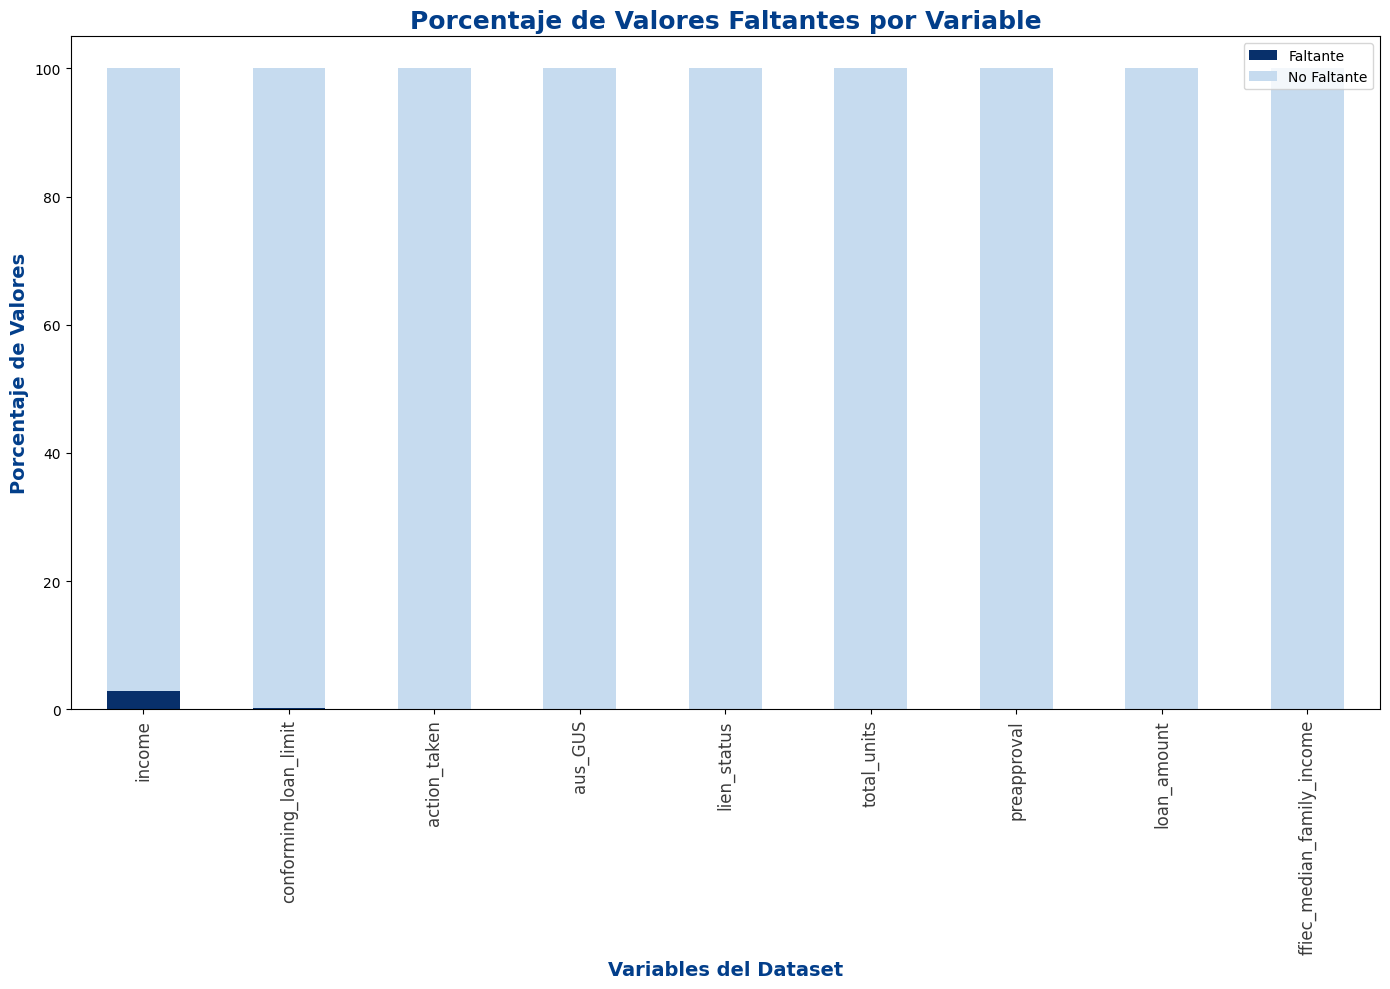

,Faltante,No Faltante
income,2.888274,97.111726
conforming_loan_limit,0.222019,99.777981
action_taken,0.000000,100.000000
aus_GUS,0.000000,100.000000
lien_status,0.000000,100.000000
total_units,0.000000,100.000000
preapproval,0.000000,100.000000
loan_amount,0.000000,100.000000
ffiec_median_family_income,0.000000,100.000000


In [346]:
MissingPercentages = (Dataset.isnull().mean() * 100).sort_values(ascending=False)

MissingData = pd.DataFrame({'Faltante': MissingPercentages, 'No Faltante': 100 - MissingPercentages})

plt.figure(figsize=(14, 10))
MissingData.plot(kind='bar', stacked=True, color=['#08306b', '#c6dbef'], ax=plt.gca()) 

plt.title('Porcentaje de Valores Faltantes por Variable', fontsize=18, weight='bold', color='#023e8a')
plt.xlabel('Variables del Dataset', fontsize=14, weight='bold', color='#023e8a')
plt.ylabel('Porcentaje de Valores', fontsize=14, weight='bold', color='#023e8a')
plt.xticks(rotation=90, fontsize=12, color='#3B3B3B') 
plt.legend(['Faltante', 'No Faltante'], loc='upper right')


plt.tight_layout()
plt.show()

display(MissingData)

### **Imputación de Datos Faltantes** 

En la fase de preprocesamiento de datos, es esencial abordar los valores faltantes para garantizar la integridad de los análisis posteriores y la construcción de modelos predictivos. A partir del análisis de los datos faltantes, se identificó que la variable `income` presenta un porcentaje bajo de valores faltantes (2.88%), mientras que la variable `conforming_loan_limit` también muestra un porcentaje menor (0.22%). Las demás variables en el conjunto de datos (`aus_GUS`, `lien_status`, `total_units`, `preapproval`, `loan_amount`, `ffiec_median_family_income`) no contienen valores faltantes, lo cual indica que no requieren ningún tratamiento adicional para la imputación.

Dado el bajo porcentaje de datos faltantes en las variables mencionadas, se seleccionaron métodos de imputación eficientes que minimicen los costos computacionales y eviten introducir sesgos significativos. Para la variable `income`, se utilizó la imputación por mediana. Este método es adecuado porque, según Acuña y Rodriguez (2004), la mediana es robusta frente a valores atípicos y es una opción recomendada cuando se trabaja con datos financieros que pueden tener distribuciones sesgadas. Por otro lado, la variable `conforming_loan_limit`, que presenta valores faltantes mínimos, también puede beneficiarse de la imputación utilizando su valor más frecuente (moda), pero dado que el porcentaje es tan bajo, cualquier método puede resultar efectivo.

#### **Tratamiento de Datos Faltantes en la Variable "Income"**

En este análisis, primero nos enfocamos en la variable "income", que es una variable clave en el dataset. Esta variable representa los ingresos en miles de dólares y es fundamental para entender el perfil financiero de los solicitantes de préstamos.


##### **Verificación de Valores Negativos**
Antes de proceder con la imputación de los datos faltantes, es crucial verificar la presencia de valores negativos en la variable "income". Dado que los ingresos no pueden ser negativos en un contexto financiero real, cualquier valor negativo debe considerarse un error de entrada de datos. Para manejar estos errores, se identificaron los valores negativos en "income" y se decidieron tratar como valores faltantes (NA). Esta decisión asegura que estos valores no influyan de manera incorrecta en el análisis y los modelos predictivos posteriores.


In [347]:
NegativeValues = Dataset[Dataset['income'] < 0]['income']
NegativeValuesCount = NegativeValues.count()

NegativeValuesCount, display(NegativeValues.head())  

416      -28.0
450     -168.0
4356    -209.0
4361   -1063.0
4674    -224.0
Name: income, dtype: float64

(np.int64(175), None)

##### **Proceso de Conversión de Valores Negativos a NA**

Se realizó una inspección detallada de la variable "income" para detectar valores negativos. Se encontraron 175 casos con valores negativos, que fueron convertidos a NA para su tratamiento adecuado. Esta conversión es esencial porque permite un manejo consistente de los datos faltantes, manteniendo la integridad del análisis.



In [348]:
Dataset['income'] = Dataset['income'].apply(lambda x: np.nan if x < 0 else x)

##### **Revisión del Porcentaje de Datos Faltantes:**

Después de convertir los valores negativos a NA, se recalculó el porcentaje de datos faltantes en la variable "income". Este paso es importante para evaluar la magnitud de los datos que requieren imputación y para decidir el método más adecuado de imputación.


In [349]:
MissingIncome = Dataset['income'].isna().mean() * 100
print(f"Porcentaje de valores faltantes en 'income' después de convertir negativos a NA: {MissingIncome:.2f}%")

Porcentaje de valores faltantes en 'income' después de convertir negativos a NA: 2.93%


##### **Imputación de Valores Faltantes en la Variable "Income"**
Para la variable "income", la imputación más adecuada sería utilizar la mediana de la distribución. La razón detrás de esta elección es que la mediana es una medida robusta de tendencia central que no se ve afectada por valores atípicos. Como se observó previamente la distribución de "income" es asimétrica hacia la derecha (sesgada), lo que hace que la media no sea un buen representante central de los datos. La imputación por la mediana, por lo tanto, ayudará a mantener la distribución original de los datos lo más cercana posible.

In [350]:
MedianIncome = Dataset['income'].median()
Dataset['income'].fillna(MedianIncome, inplace=True)

print(f"Mediana utilizada para la imputación en 'income': {MedianIncome}")


Mediana utilizada para la imputación en 'income': 107.0


##### **Visualización de la Distribución de "Income" Antes y Después de la Imputación**

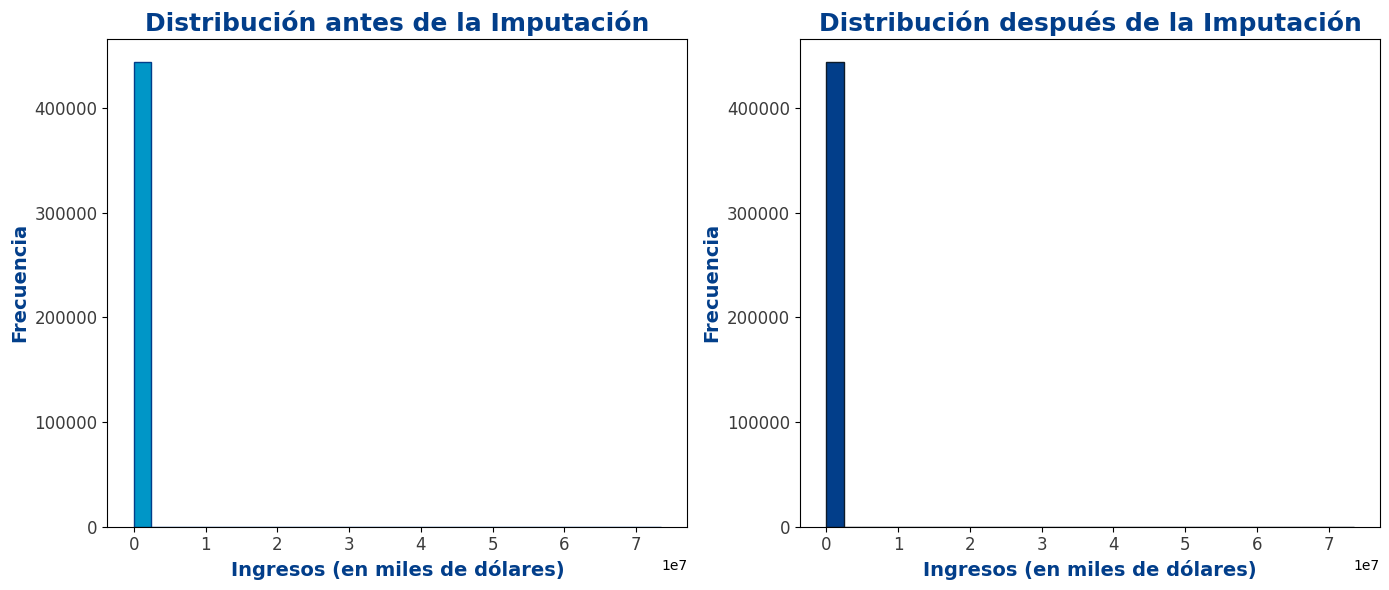

In [351]:

plt.figure(figsize=(14, 6))

# Histograma de 'income' antes de la imputación
plt.subplot(1, 2, 1)
plt.hist(Dataset['income'].dropna(), bins=30, edgecolor='#023e8a', color='#0096c7')
plt.title('Distribución antes de la Imputación', fontsize=18, weight='bold', color='#023e8a')
plt.xlabel('Ingresos (en miles de dólares)', fontsize=14, weight='bold', color='#023e8a')
plt.ylabel('Frecuencia', fontsize=14, weight='bold', color='#023e8a')
plt.xticks(fontsize=12, color='#3B3B3B')
plt.yticks(fontsize=12, color='#3B3B3B')

# Histograma de 'income' después de la imputación
plt.subplot(1, 2, 2)
plt.hist(Dataset['income'], bins=30, edgecolor='#0d1b2a', color='#023e8a')
plt.title('Distribución después de la Imputación', fontsize=18, weight='bold', color='#023e8a')
plt.xlabel('Ingresos (en miles de dólares)', fontsize=14, weight='bold', color='#023e8a')
plt.ylabel('Frecuencia', fontsize=14, weight='bold', color='#023e8a')
plt.xticks(fontsize=12, color='#3B3B3B')
plt.yticks(fontsize=12, color='#3B3B3B')

plt.tight_layout()

plt.show()


En esta gráfica de distribución de la variable "Income" antes y después de la imputación, podemos observar que ambas distribuciones parecen extremadamente concentradas en un rango muy estrecho. Este comportamiento puede deberse a la presencia de valores atípicos (outliers) que están distorsionando la visualización.

En el gráfico antes de la imputación, la mayoría de los datos están concentrados cerca de 0, y en el gráfico después de la imputación, se mantiene el mismo patrón. Esto sugiere que, aunque los valores faltantes han sido reemplazados, los valores extremos pueden estar afectando la distribución general de la variable, lo que resulta en una gráfica con un rango de ingresos muy limitado.

Es posible que existan valores muy grandes o muy pequeños en "Income" que no son representativos de la mayoría de los datos. Estos valores atípicos podrían estar causando que el histograma aparezca comprimido, haciendo difícil ver la verdadera distribución de los ingresos. Para obtener una mejor comprensión, sería necesario realizar un análisis de detección y tratamiento de valores atípicos, lo que podría incluir la transformación de datos o la eliminación de estos valores extremos.

#### **Tratamiento de Datos Faltantes en la Variable "conforming_loan_limit"**

##### **Imputación de Datos Faltantes en la Variable conforming_loan_limit**
La variable  `conforming_loan_limit` es categórica y clasifica los préstamos en "C" (Conforming), "NC" (Nonconforming), "U" (Undetermined) y "NA" (Not Applicable). Sin embargo, existen valores faltantes en esta columna, lo que requiere un tratamiento adecuado antes de continuar con cualquier análisis o modelado predictivo. Dado que los datos son categóricos y solo presentan dos categorías, la mejor estrategia para imputar los valores faltantes es la imputación por moda (el valor más frecuente). Este enfoque es apropiado cuando se trabaja con datos categóricos que tienen una distribución sesgada, como es el caso con c`conforming_loan_limit`.

In [352]:
print("Valores únicos en 'conforming_loan_limit':", Dataset['conforming_loan_limit'].unique())

MissingConforming = Dataset['conforming_loan_limit'].isna().sum()
print(f"Cantidad de valores faltantes en 'conforming_loan_limit': {MissingConforming}")

MissingPer = Dataset['conforming_loan_limit'].isna().mean() * 100
print(f"Porcentaje de valores faltantes en 'conforming_loan_limit': {MissingPer:.2f}%")


Valores únicos en 'conforming_loan_limit': ['C', 'NC', NaN]
Categories (2, object): ['C', 'NC']
Cantidad de valores faltantes en 'conforming_loan_limit': 985
Porcentaje de valores faltantes en 'conforming_loan_limit': 0.22%


Al verificar los datos, se encontraron 985 valores faltantes en esta variable, representando un pequeño porcentaje del total. Después de calcular la moda de la columna, que resultó ser "C" (Conforming), utilizamos este valor para imputar los datos faltantes. Como siguiente paso, realizamos la imputación con base en la moda. 

In [353]:
ModeConforming = Dataset['conforming_loan_limit'].mode()[0]  
Dataset['conforming_loan_limit'].fillna(ModeConforming, inplace=True)
print(f"Se ha imputado 'conforming_loan_limit' con su moda: {ModeConforming}")

Se ha imputado 'conforming_loan_limit' con su moda: C


##### **Visualización de la Distribución antes y después de la Imputación**

La visualización de la distribución de los datos antes y después de la imputación es fundamental para evaluar el impacto del proceso de imputación en la estructura de los datos. En este caso, la gráfica muestra la distribución de la variable conforming_loan_limit antes de la imputación (con valores faltantes eliminados) y después de la imputación (con valores faltantes reemplazados por la moda).


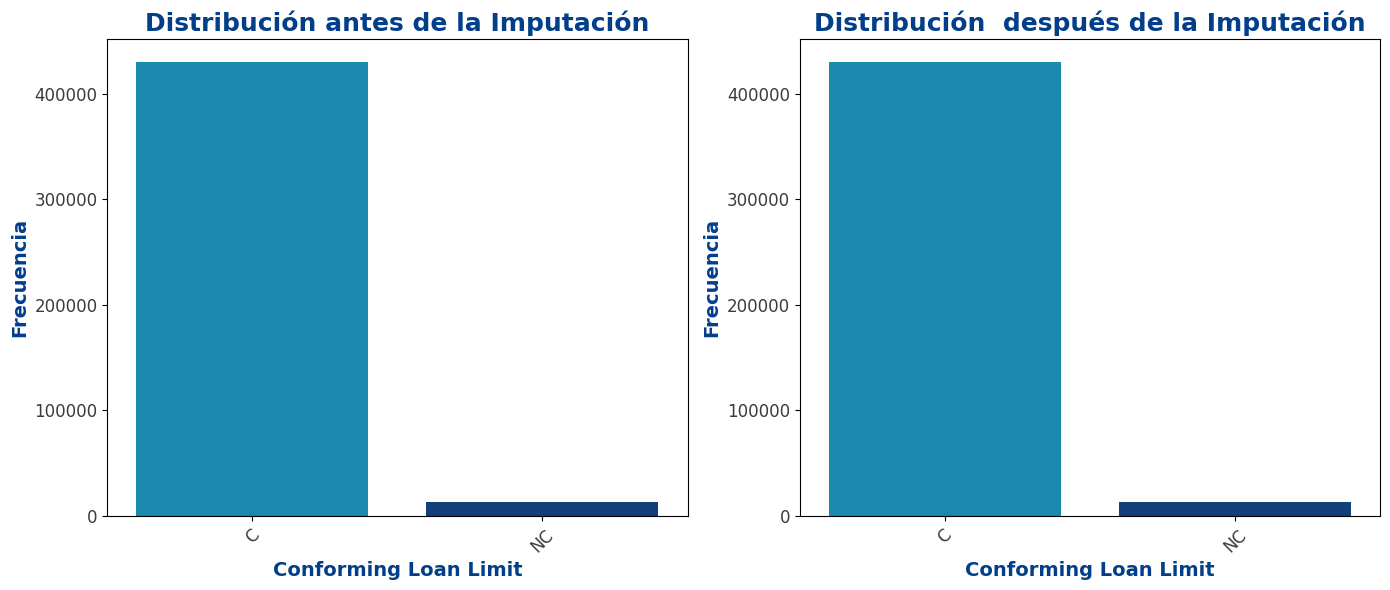

In [354]:

plt.figure(figsize=(14, 6))

# Distribución antes de la imputación 
plt.subplot(1, 2, 1)
sns.countplot(x='conforming_loan_limit', data=Dataset.dropna(subset=['conforming_loan_limit']), palette=['#0096c7', '#023e8a'])
plt.title("Distribución antes de la Imputación", fontsize=18, weight='bold', color='#023e8a')
plt.xticks(rotation=45, fontsize=12, color='#3B3B3B')
plt.xlabel("Conforming Loan Limit", fontsize=14, weight='bold', color='#023e8a')
plt.ylabel("Frecuencia", fontsize=14, weight='bold', color='#023e8a')
plt.yticks(fontsize=12, color='#3B3B3B')

# Distribución después de la imputación
plt.subplot(1, 2, 2)
sns.countplot(x='conforming_loan_limit', data=Dataset, palette=['#0096c7', '#023e8a'])
plt.title("Distribución  después de la Imputación", fontsize=18, weight='bold', color='#023e8a')
plt.xticks(rotation=45, fontsize=12, color='#3B3B3B')
plt.xlabel("Conforming Loan Limit", fontsize=14, weight='bold', color='#023e8a')
plt.ylabel("Frecuencia", fontsize=14, weight='bold', color='#023e8a')
plt.yticks(fontsize=12, color='#3B3B3B')

plt.tight_layout()

plt.show()


La distribución de la variable antes de la imputación muestra que la gran mayoría de los valores son "C" (Conforming), mientras que una pequeña proporción corresponde a "NC" (Nonconforming). Esta distribución se basa solo en los datos disponibles, ya que los valores faltantes no se incluyen en esta representación. La categoría "C" es claramente dominante en el dataset. Luego de la imputación con la moda, que es "C", todos los valores faltantes han sido reemplazados por la categoría "C". Como resultado, la gráfica muestra un aumento en la frecuencia de la categoría "C" después de la imputación, mientras que la frecuencia de la categoría "NC" permanece prácticamente sin cambios. Este aumento se debe a la adición de los valores faltantes como "C", lo que no altera de manera significativa la distribución general de los datos, dado que "C" ya era la categoría dominante.

La imputación por moda es una estrategia efectiva para manejar datos faltantes en una variable categórica donde una categoría es claramente dominante, como se observa en `conforming_loan_limit`. Este método no distorsiona la distribución general y mantiene la consistencia de los datos. Sin embargo, es importante tener en cuenta que la elección de la moda como método de imputación puede reforzar la frecuencia de la categoría dominante, lo cual es aceptable en casos donde se puede justificar que los valores faltantes son más propensos a pertenecer a la categoría más frecuente.


## **Análisis de Datos Atípicos**

Los outliers, o datos atípicos, son observaciones que se desvían significativamente de otros puntos del conjunto de datos y pueden impactar negativamente en el análisis estadístico y en el rendimiento de los modelos predictivos. La presencia de outliers puede sesgar los resultados y afectar la precisión de los modelos, lo que hace esencial su identificación y tratamiento. En esta sección, se abordan las técnicas más reconocidas para la detección de outliers, como los diagramas de caja (boxplots), el cálculo del Z-Score y el método del rango intercuartílico (IQR). Además, se exploran estrategias para su tratamiento, incluyendo la imputación con la mediana, la transformación de variables y la eliminación de valores extremos, fundamentando cada método con referencias académicas.

### **Identificación de Outliers**

#### **Identificación de Outliers Utilizando Diagramas de Caja (Boxplots)**

Los diagramas de caja, o *boxplots*, son una herramienta gráfica ampliamente utilizada en estadística para identificar posibles outliers. Según McGill et al. (1978), un boxplot muestra la distribución de una variable a través de sus cuartiles y los "bigotes" que indican el rango de variación normal de los datos. Los puntos que caen fuera de estos "bigotes" son considerados como potenciales outliers. Esta visualización proporciona una representación intuitiva de los datos, facilitando la identificación de valores anómalos.

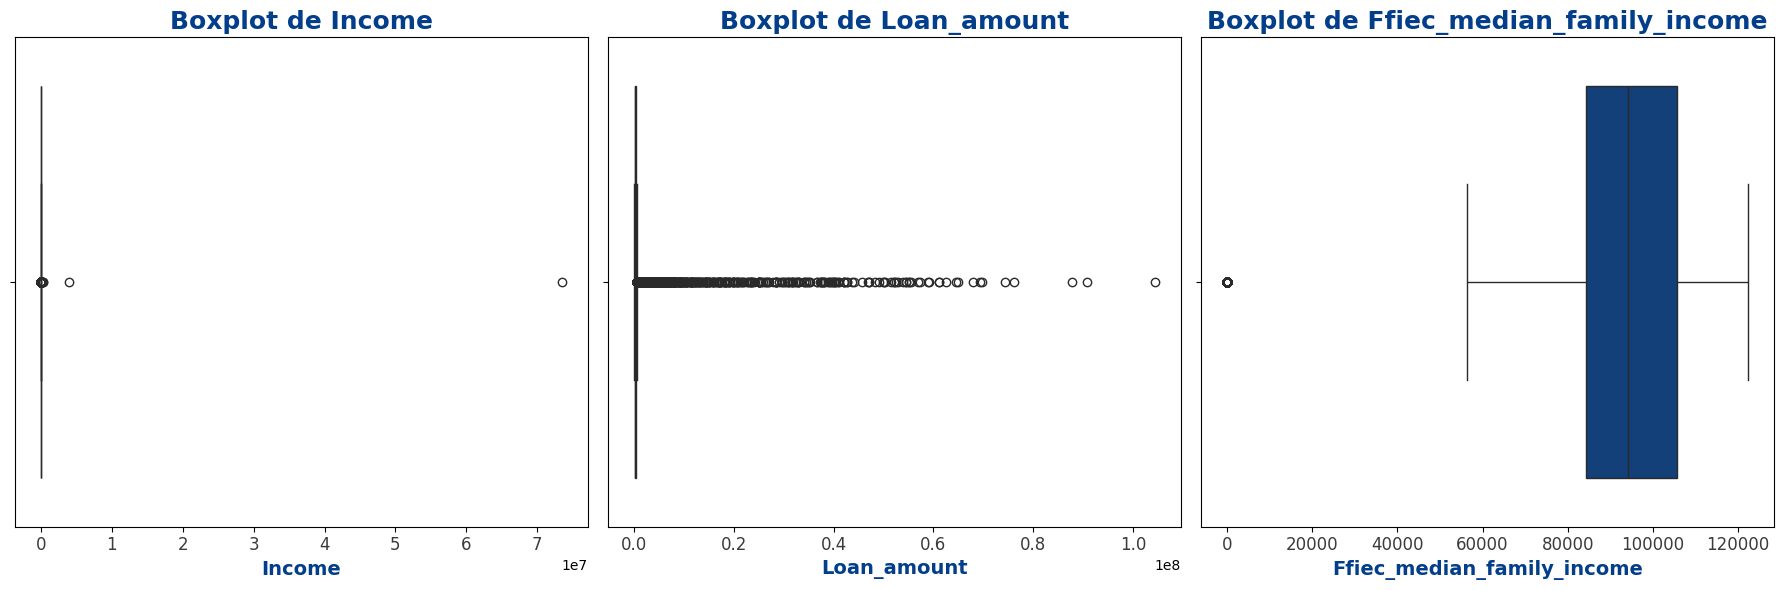

In [355]:
NumVars = ['income', 'loan_amount', 'ffiec_median_family_income']

plt.figure(figsize=(18, 6))

for i, var in enumerate(NumVars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=Dataset[var], color="#023e8a")
    
    plt.title(f'Boxplot de {var.capitalize()}', fontsize=18, weight='bold', color='#023e8a')
    
    plt.xlabel(var.capitalize(), fontsize=14, weight='bold', color='#023e8a')
    plt.xticks(fontsize=12, color='#3B3B3B')
    plt.yticks(fontsize=12, color='#3B3B3B')

plt.tight_layout()

plt.show()


Este código genera un boxplot para cada variable numérica del dataset. Las observaciones fuera del rango de los "bigotes" se consideran como potenciales outliers.

#### **Detección de Outliers Mediante el Cálculo del Z-Score**
El Z-Score es una técnica basada en la estadística que mide la desviación estándar de un punto de datos con respecto a la media del conjunto. Según Iglewicz y Hoaglin (1993), los valores con un Z-Score superior a 3 o inferior a -3 suelen considerarse outliers. Esta técnica es particularmente útil para datos que siguen una distribución normal.

In [356]:
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Cálculo del Z-Score para las variables numéricas
zScores = np.abs(zscore(Dataset[NumVars]))

threshold = 3
outliers = np.where(zScores > threshold)

outliers_indices = list(set(outliers[0]))

outliers_count = (zScores > threshold).sum(axis=0)

print(f"Umbral de Z-Score utilizado: {threshold}")
print(f"Total de filas con al menos un outlier: {len(outliers_indices)}")
print("\nNúmero de outliers detectados por variable:")
for var, count in zip(NumVars, outliers_count):
    print(f"  - {var}: {count} outliers")

print("\nVista previa de algunas filas con outliers:")
display(Dataset.iloc[outliers_indices].head())


Umbral de Z-Score utilizado: 3
Total de filas con al menos un outlier: 4720

Número de outliers detectados por variable:
  - income: 3 outliers
  - loan_amount: 774 outliers
  - ffiec_median_family_income: 3949 outliers

Vista previa de algunas filas con outliers:


,action_taken,lien_status,aus_GUS,total_units,conforming_loan_limit,preapproval,loan_amount,income,ffiec_median_family_income
8192,Loan Originated,First Liena,0,1,NC,Preapproval Not Requested,2855000.0,3315.0,122300
358209,Application Denied,First Liena,0,1,C,Preapproval Not Requested,135000.0,109.0,0
380664,Application Denied,Subordinate Lien,0,1,C,Preapproval Not Requested,5000.0,64.0,0
278533,Application Denied,First Liena,0,1,C,Preapproval Not Requested,35000.0,18.0,0
358210,Application Denied,First Liena,0,1,C,Preapproval Not Requested,285000.0,52.0,0


El código anterior calcula el Z-Score para cada variable numérica y detecta las observaciones que son outliers según el umbral establecido de 3 desviaciones estándar.

#### **Método del Rango Intercuartílico (IQR) para Detección de Outliers**

El método del rango intercuartílico (IQR) es una técnica robusta para la detección de outliers que no asume una distribución normal de los datos. Tukey (1977) propone que cualquier observación que caiga fuera del rango entre el primer cuartil (Q1) y el tercer cuartil (Q3), más o menos 1.5 veces el IQR, se considere un outlier. Esta técnica es especialmente eficaz para identificar valores extremos en distribuciones asimétricas.

In [357]:
def OutliersIQR(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[variable] < (Q1 - 1.5 * IQR)) | (data[variable] > (Q3 + 1.5 * IQR))]
    return outliers

for var in NumVars:
    outliers_iqr = OutliersIQR(Dataset, var)
    print(f'Outliers detectados en {var} utilizando el método IQR:', outliers_iqr.shape[0])


Outliers detectados en income utilizando el método IQR: 31682
Outliers detectados en loan_amount utilizando el método IQR: 20504
Outliers detectados en ffiec_median_family_income utilizando el método IQR: 3949


### **Estrategias de Tratamiento de Outliers**
Una vez identificados los outliers, es crucial decidir cómo manejarlos. Según Aggarwal (2016), las estrategias comunes incluyen:

- **Imputación:** Reemplazar los outliers con la mediana es útil cuando los datos atípicos son errores o entradas erróneas. La mediana es robusta a los outliers y no afecta significativamente la distribución central.

- **Transformación:** Aplicar transformaciones, como la logarítmica, reduce el impacto de los outliers y es adecuado para datos sesgados positivamente.

- **Eliminación:** Eliminar outliers es viable cuando estos representan errores de datos evidentes o son irrelevantes para el análisis.

In [358]:
# Imputación de outliers con la mediana

def ImputeOutliersMedian(data, variable):
    median = data[variable].median()
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[(data[variable] < lower_bound) | (data[variable] > upper_bound), variable] = median

# Aplicar imputación a las variables
for var in NumVars:
    ImputeOutliersMedian(Dataset, var)


### **Visualización de la Distribución Después del Tratamiento de Outliers**

Es importante visualizar las distribuciones después del tratamiento de outliers para asegurarse de que las estrategias aplicadas no distorsionen significativamente los datos.

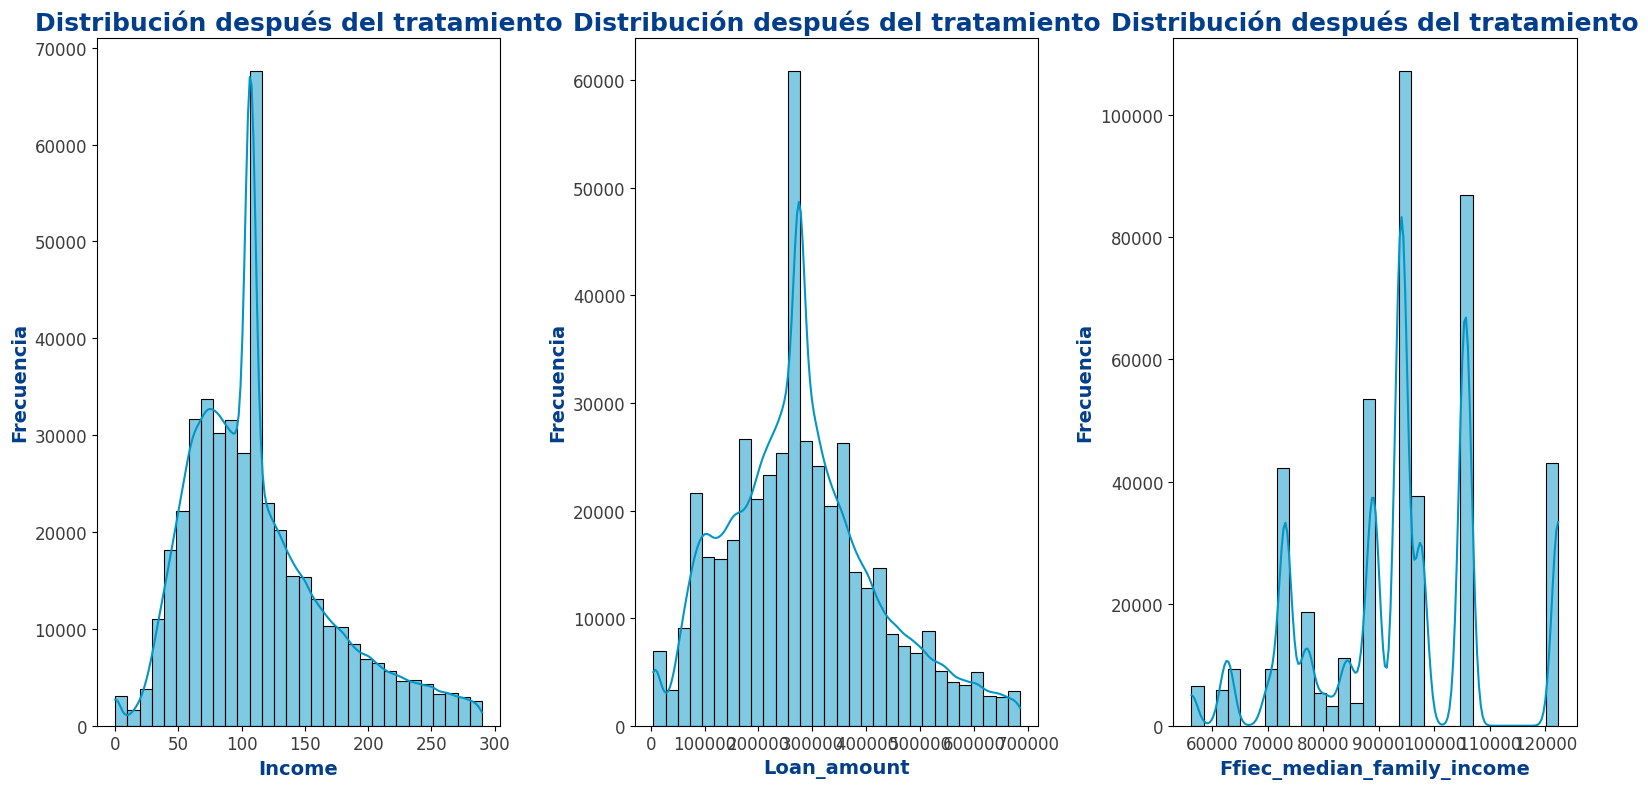

In [359]:
NumVars = ['income', 'loan_amount', 'ffiec_median_family_income']

plt.figure(figsize=(16, 8))

for i, var in enumerate(NumVars, 1): 
    plt.subplot(1, 3, i)
    sns.histplot(Dataset[var], bins=30, kde=True, color='#0096c7')  
    
    plt.title(f'Distribución después del tratamiento', fontsize=18, weight='bold', color='#023e8a')
    
    plt.xlabel(var.capitalize(), fontsize=14, weight='bold', color='#023e8a')
    plt.ylabel('Frecuencia', fontsize=14, weight='bold', color='#023e8a')
    
    plt.xticks(fontsize=12, color='#3B3B3B')
    plt.yticks(fontsize=12, color='#3B3B3B')

plt.tight_layout()

plt.show()


La gráfica muestra la distribución de tres variables numéricas (`income`, `loan_amount` y `ffiec_median_family_income`) después del tratamiento de outliers. A continuación, se presenta una interpretación detallada de cada una:

1. **Distribucción de** `Income`: La variable presenta una distribución sesgada a la derecha, lo que es característico de datos que están agrupados hacia el extremo inferior del rango de valores con una larga cola hacia la derecha. Esto sugiere que la mayoría de los ingresos reportados están en los niveles más bajos y medios, mientras que hay menos casos con ingresos muy altos. La línea KDE superpuesta resalta esta concentración de datos alrededor del rango de ingresos bajos a medios (aproximadamente entre 50 y 100 miles de dólares). El pico pronunciado también puede indicar la presencia de muchos valores similares o agrupados alrededor de un punto específico, lo cual podría ser un resultado de la imputación realizada.

2. **Distribución de** `loan_amount`: Esta distribución también muestra una forma sesgada a la derecha, aunque menos pronunciada que la anterior. La mayor concentración de los datos se encuentra en torno a 300,000 a 350,000 dólares. Esto sugiere que la mayoría de los préstamos solicitados están en este rango, con menos préstamos significativamente menores o mayores. La distribución sigue una curva casi normal pero con una ligera cola hacia la derecha, lo que sugiere que hay algunos préstamos de montos considerablemente altos. El tratamiento de outliers parece haber ayudado a suavizar la distribución, pero todavía hay valores que podrían considerarse extremos.

3. **Distribución de** `ffiec_median_family_income`: La variable tiene una distribución multimodal, es decir, presenta varios picos. Esto sugiere la existencia de varios subgrupos dentro del conjunto de datos con diferentes niveles de ingresos familiares medianos, lo cual podría estar relacionado con diferentes áreas geográficas o segmentos de la población. El patrón no sigue una distribución normal, indicando posibles diferencias en la estructura económica o demográfica de las áreas estudiadas. A diferencia de las otras dos variables, esta distribución no parece sesgada y es más irregular, lo que podría reflejar la variabilidad en los datos económicos medianos en distintas regiones.

En general, las distribuciones indican que, aunque el tratamiento de outliers ha ayudado a reducir algunos valores extremos, cada variable conserva características intrínsecas de su distribución original. Esto puede influir en cómo se interpreten los datos y en el desarrollo de modelos predictivos.

## **Visualización de Variables de Estudio**

La visualización de datos es una herramienta fundamental en el análisis exploratorio de datos (EDA) ya que permite entender mejor las características de las variables de estudio, sus distribuciones y relaciones. A través de representaciones gráficas, como histogramas, diagramas de caja (boxplots), mapas de calor y gráficos de dispersión, es posible identificar patrones, tendencias y posibles anomalías en los datos. En esta sección, se presentan visualizaciones detalladas de las principales variables de estudio del dataset, con el objetivo de facilitar la interpretación y obtener insights relevantes que guíen la construcción de modelos predictivos y la toma de decisiones basada en datos.

### **Variable Respuesta**

La variable de respuesta en este análisis es action_taken, que indica la decisión tomada sobre el crédito hipotecario. Esta variable está codificada de tal manera que el valor 1 representa la aceptación del crédito, mientras que el valor 0 denota la negación del mismo. Comprender la distribución de esta variable es crucial para evaluar el comportamiento de los modelos predictivos y para entender los factores que influyen en las decisiones de aprobación o rechazo. A continuación, se presenta un gráfico de barras que muestra el conteo de cada categoría de action_taken, proporcionando una visión general de la proporción de créditos aprobados y rechazados en el dataset.

In [360]:
def to_proportions( data, cat_x, cat_fill ):
    counts = data.groupby([cat_x, cat_fill]).size().reset_index(name='count')
    totals = counts.groupby(cat_x, as_index=False)['count'].sum()
    totals.rename(columns={'count': 'total_count'}, inplace=True)
    counts = counts.merge(totals, on=cat_x)
    counts['proportion'] = counts['count'] / counts['total_count'] * 100
    return counts

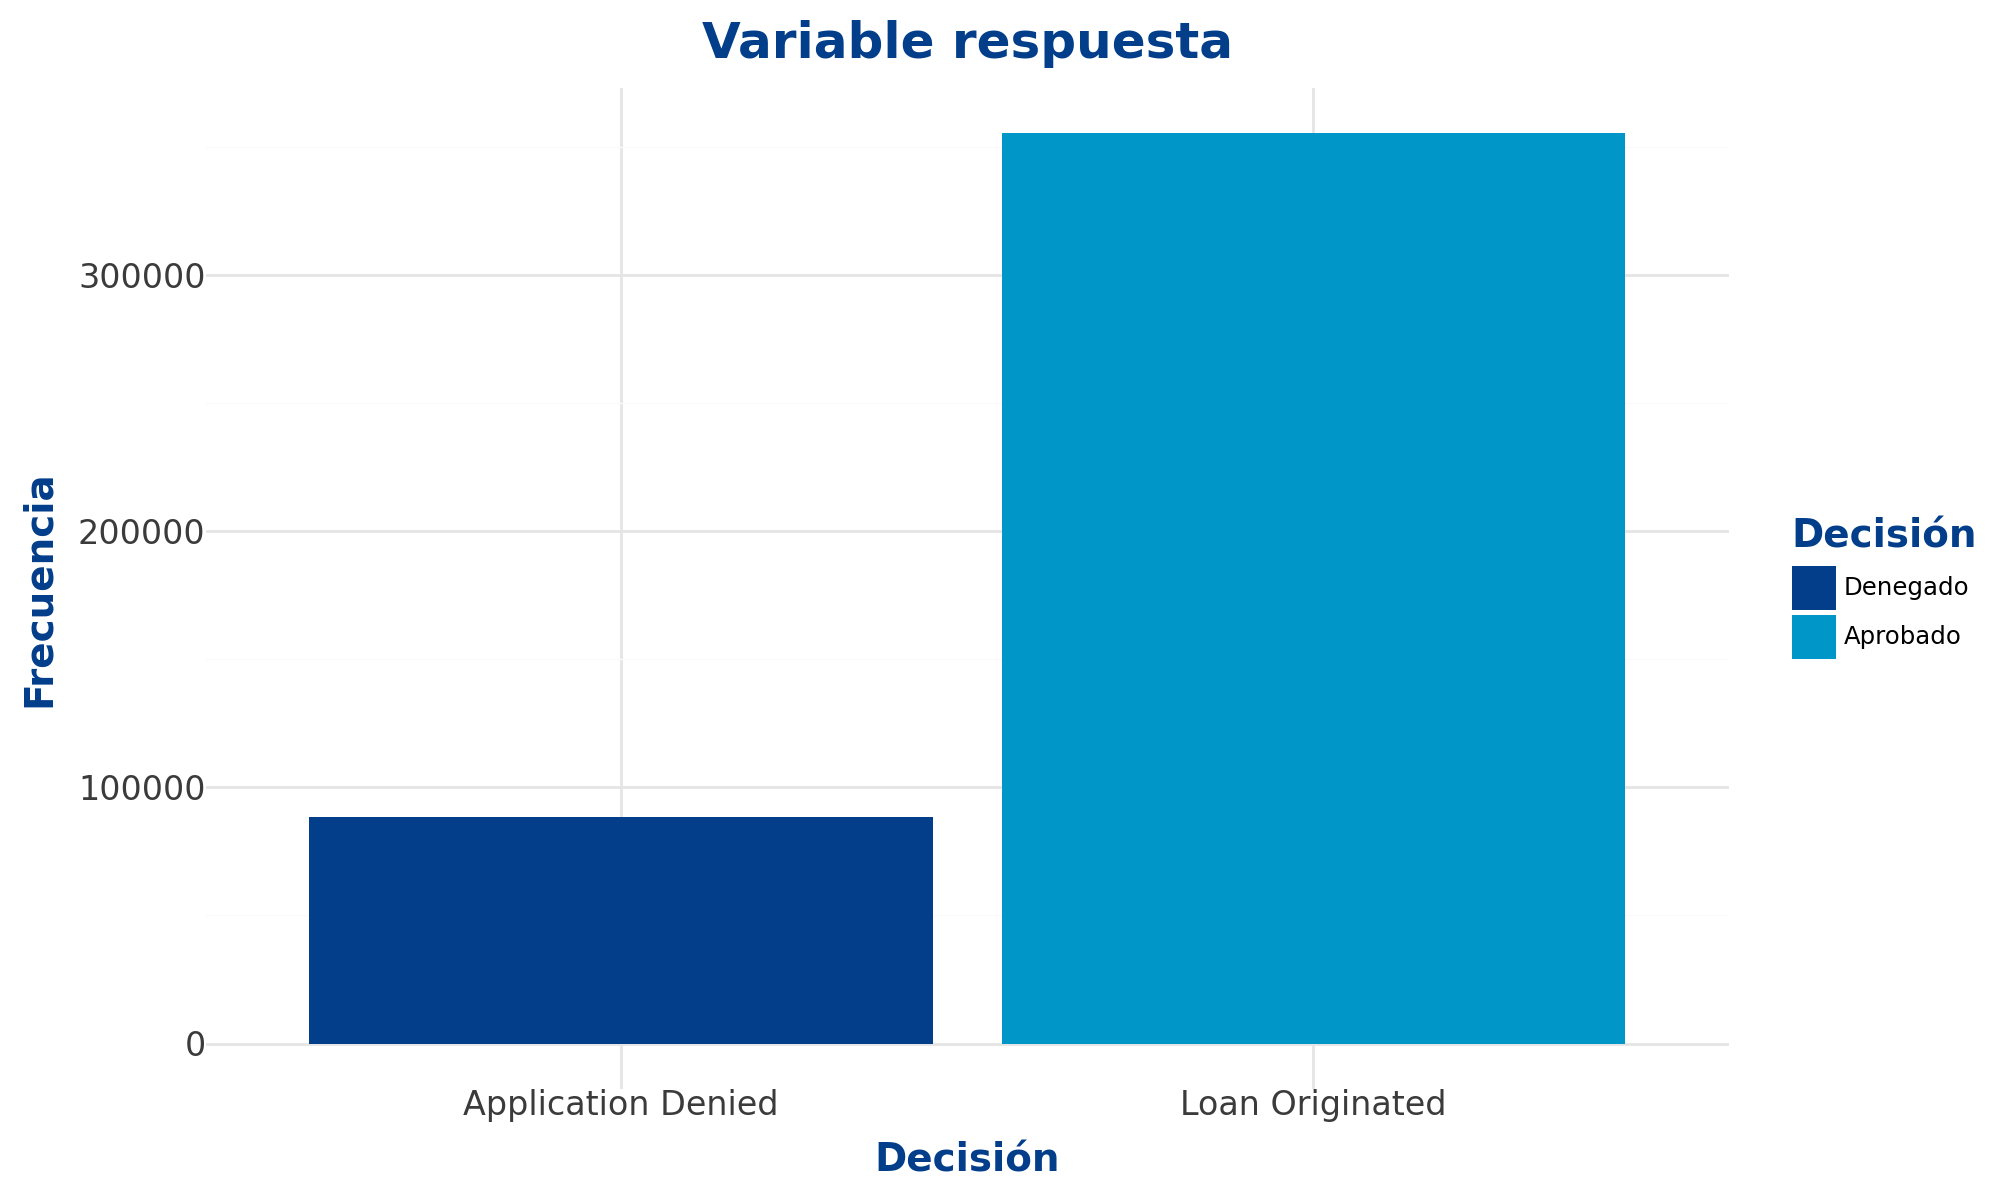

In [361]:
from plotnine import (
    ggplot, aes, geom_bar, scale_fill_manual, labs, theme, element_text, theme_minimal
)
from matplotlib import cm

blue_palette = ['#023e8a', '#0096c7']

(
    ggplot(Dataset, aes(x='factor(action_taken)', fill='factor(action_taken)'))
    + geom_bar(show_legend=True)  
    + scale_fill_manual(
        values=blue_palette,  
        labels=["Denegado", "Aprobado"]
    )
    + labs(
        title="Variable respuesta", 
        x="Decisión", 
        y="Frecuencia", 
        fill='Decisión'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6), 
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),  
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),  
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'), 
        axis_text=element_text(size=12, color='#3B3B3B'),  
        legend_title=element_text(size=14, weight='bold', color='#023e8a'), 
        legend_position='right',  
        legend_background=element_text(alpha=0),  
        legend_box_margin=0,
        legend_box='vertical'  
    )
)


### **Variables descriptivas**
La visualización de las variables descriptivas permite entender mejor la distribución y características de cada variable independiente en el conjunto de datos.  A continuación, se presentan las visualizaciones de las variables descriptivas seleccionadas para el estudio.

#### **Variables cualitativas**

##### **Variable Lien Status**
El "lien status" se refiere al estado de un gravamen o carga legal sobre una propiedad. Un gravamen es una reclamación legal contra una propiedad que se puede utilizar como garantía para pagar una deuda. Esta información es relevante para asegurarse de que no haya deudas pendientes que afecten la propiedad en cuestión.

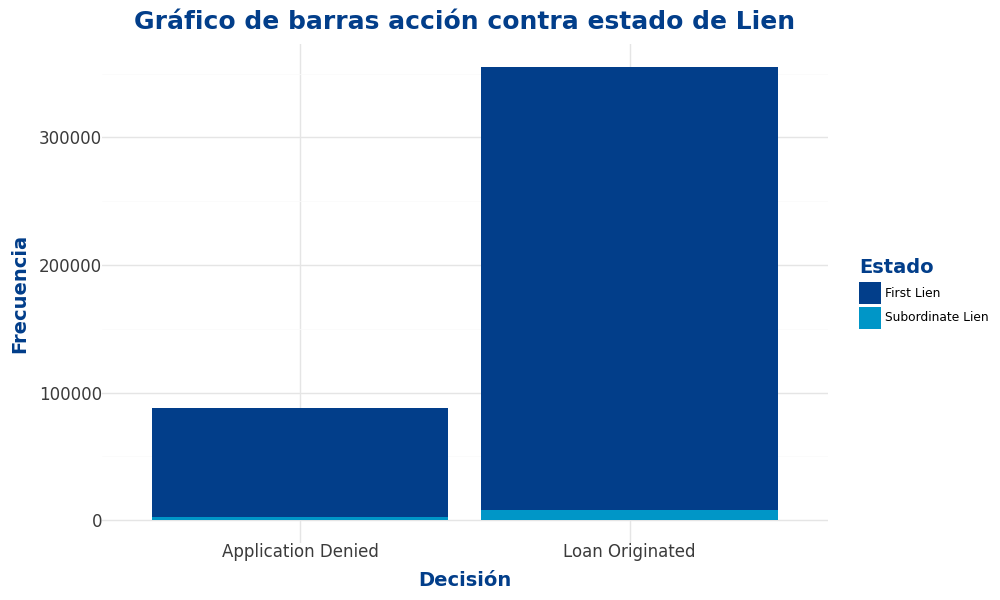

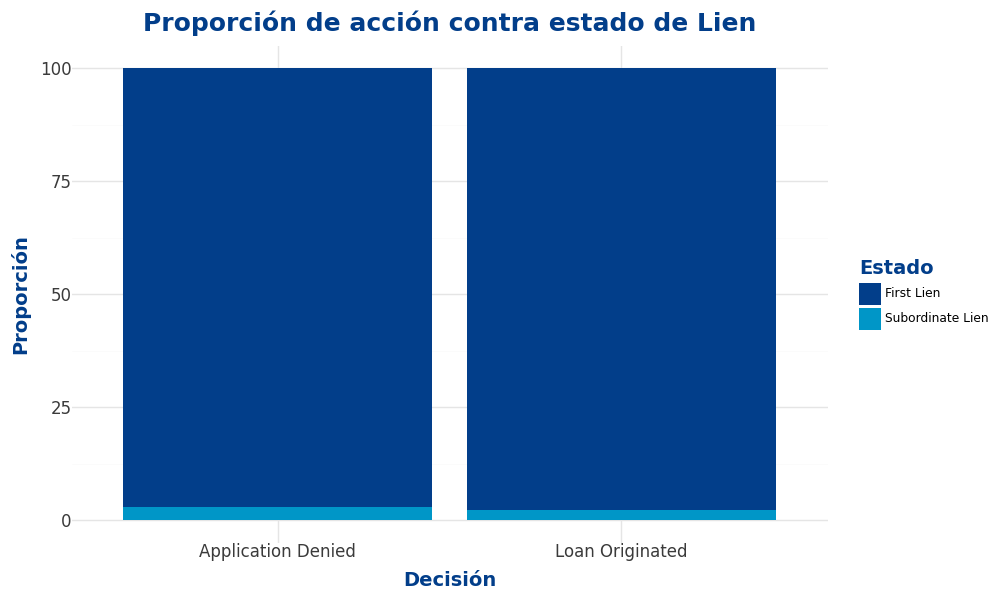

In [362]:
import matplotlib.pyplot as plt
from plotnine import (
    ggplot, aes, geom_bar, scale_fill_manual, labs, theme, element_text, theme_minimal
)
import pandas as pd

blue_palette = ['#023e8a', '#0096c7']

bar_plot = (
    ggplot(Dataset, aes(x='factor(action_taken)', fill='factor(lien_status)'))
    + geom_bar(position='stack', show_legend=True)  
    + scale_fill_manual(
        values=blue_palette,
        labels=["First Lien", "Subordinate Lien"]
    )
    + labs(
        title="Gráfico de barras acción contra estado de Lien", 
        x="Decisión", 
        y="Frecuencia", 
        fill='Estado'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),  
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),  
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'), 
        axis_text=element_text(size=12, color='#3B3B3B'),  
        legend_title=element_text(size=14, weight='bold', color='#023e8a'), 
        legend_position='right',
        legend_background=element_text(alpha=0),  
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

proportion_plot = (
    ggplot(to_proportions(Dataset, 'action_taken', 'lien_status'), 
           aes(x='factor(action_taken)', y='proportion', fill='factor(lien_status)'))
    + geom_bar(stat='identity', position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette,
        labels=["First Lien", "Subordinate Lien"]
    )
    + labs(
        title="Proporción de acción contra estado de Lien", 
        x="Decisión", 
        y="Proporción", 
        fill='Estado'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),  
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),  
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'), 
        axis_text=element_text(size=12, color='#3B3B3B'),  
        legend_title=element_text(size=14, weight='bold', color='#023e8a'), 
        legend_position='right', 
        legend_background=element_text(alpha=0),  
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

bar_plot.draw(show=True)
proportion_plot.draw(show=True)

plt.show()


Los dos gráficos presentados ofrecen una perspectiva complementaria sobre la relación entre la acción tomada (`action_taken`) y el estado del lien (`lien_status`). El primer gráfico de barras muestra el conteo de aplicaciones de crédito hipotecario que fueron aprobadas o denegadas, segmentadas por el tipo de lien (`First Lien` o `Subordinate Lien`). Es evidente que la mayoría de las aprobaciones y denegaciones están asociadas con el `First Lien`, aunque el `Subordinate Lien` también tiene presencia, especialmente en las aplicaciones denegadas.

El segundo gráfico, que muestra las proporciones, permite una interpretación más matizada de los datos. Aquí, se presenta la proporción de `First Lien` y `Subordinate Lien` dentro de las categorías de `Application Denied` y `Loan Originated`. Aunque el primer gráfico resalta el volumen, el segundo gráfico revela que, proporcionalmente, los `Subordinate Liens` están más presentes en las aplicaciones denegadas que en las aprobadas, lo cual es una observación importante para entender la dinámica de los créditos según el tipo de lien.

La combinación de estos dos gráficos es crucial porque el gráfico de barras por conteo brinda un contexto del volumen absoluto, mientras que el gráfico de proporciones resalta las relaciones relativas entre las variables, proporcionando un análisis más completo y detallado.

##### **Variable AUS: GUS**
AUS significa "Automated Underwriting System" (Sistema de Subrogación Automatizado). En el contexto de HMDA (Home Mortgage Disclosure Act), es necesario que las instituciones financieras informen el nombre del AUS utilizado y los resultados generados como parte de sus datos de HMDA. Esto se requiere para asegurar la transparencia y el cumplimiento en el proceso de préstamos hipotecarios.

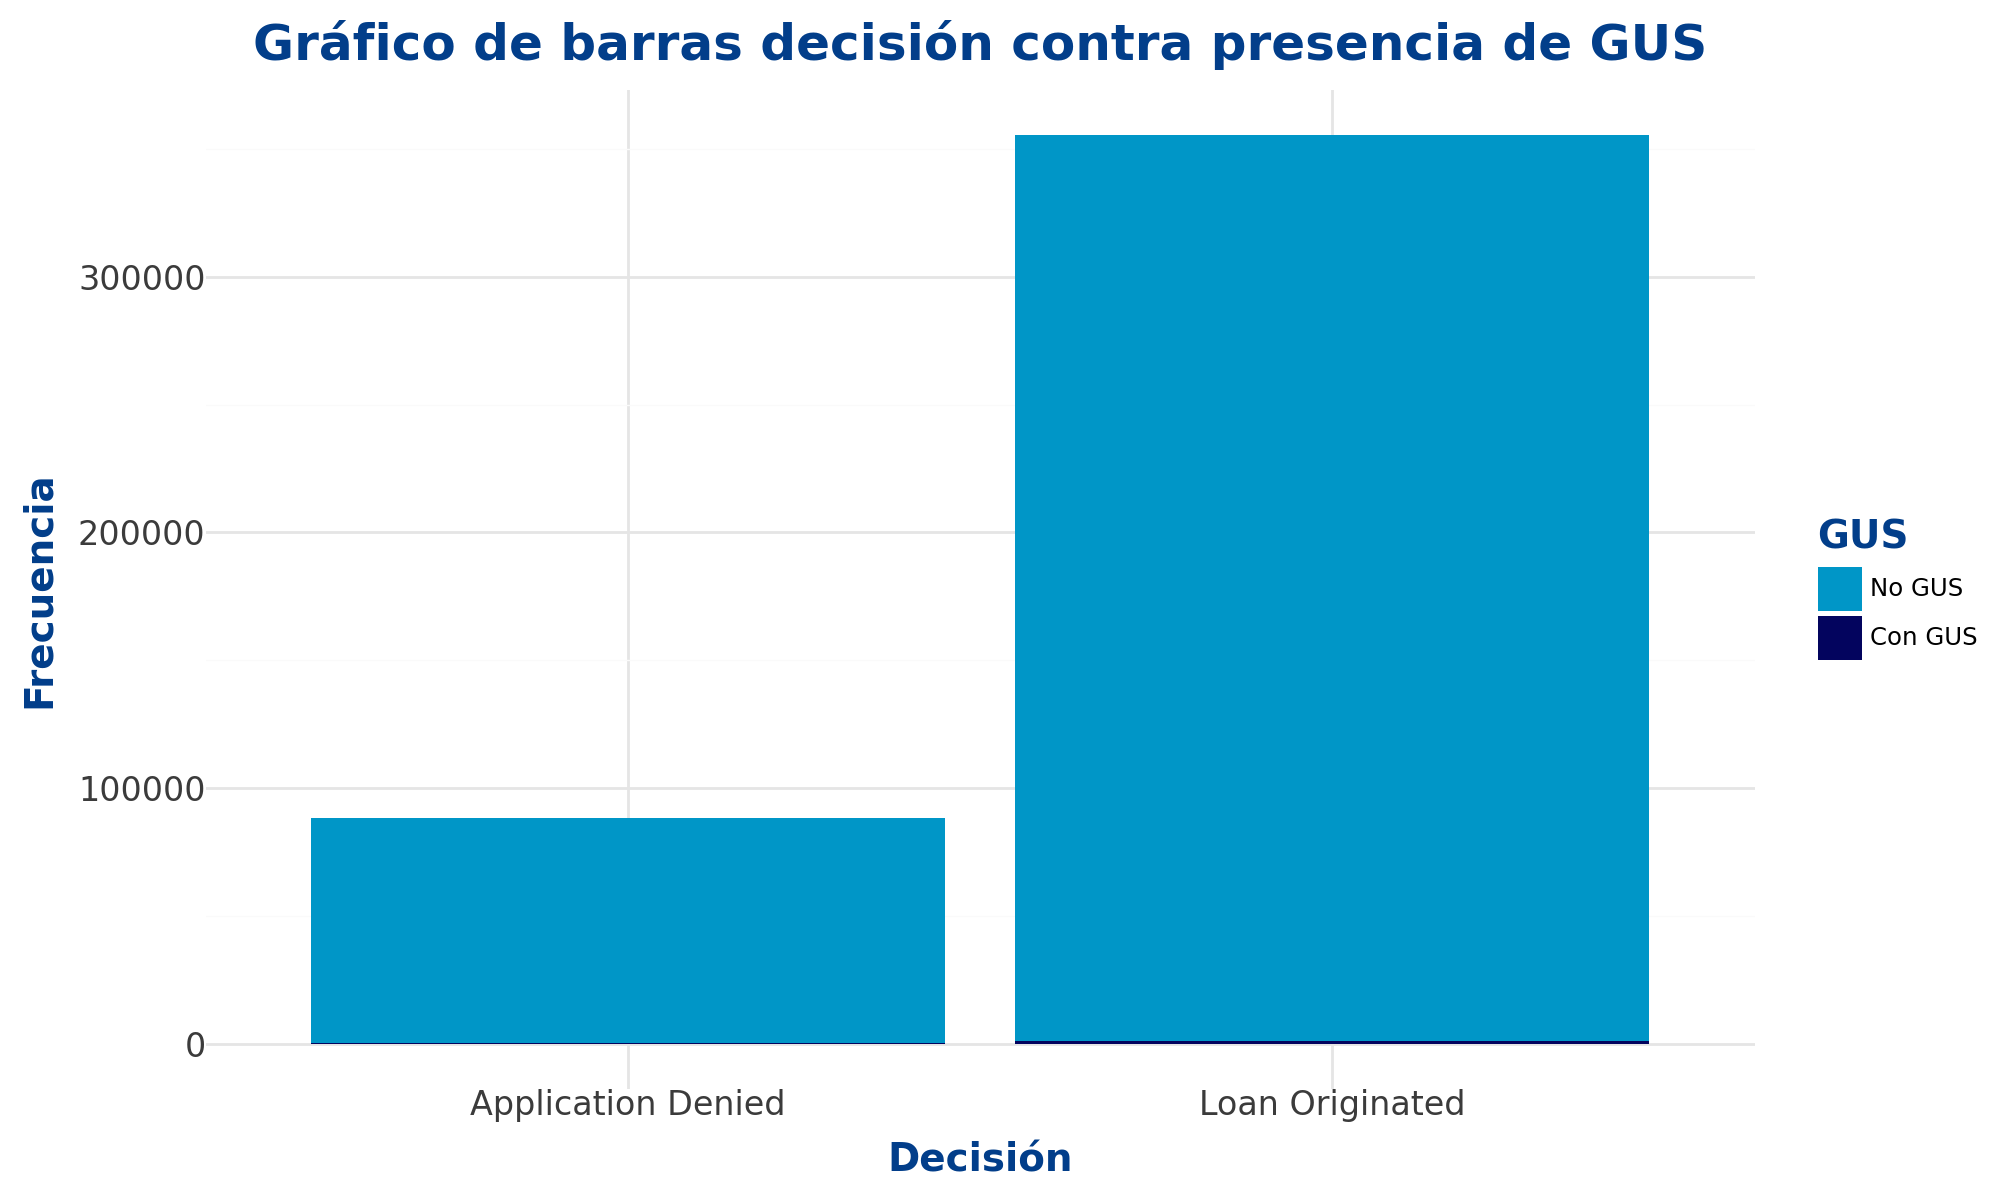

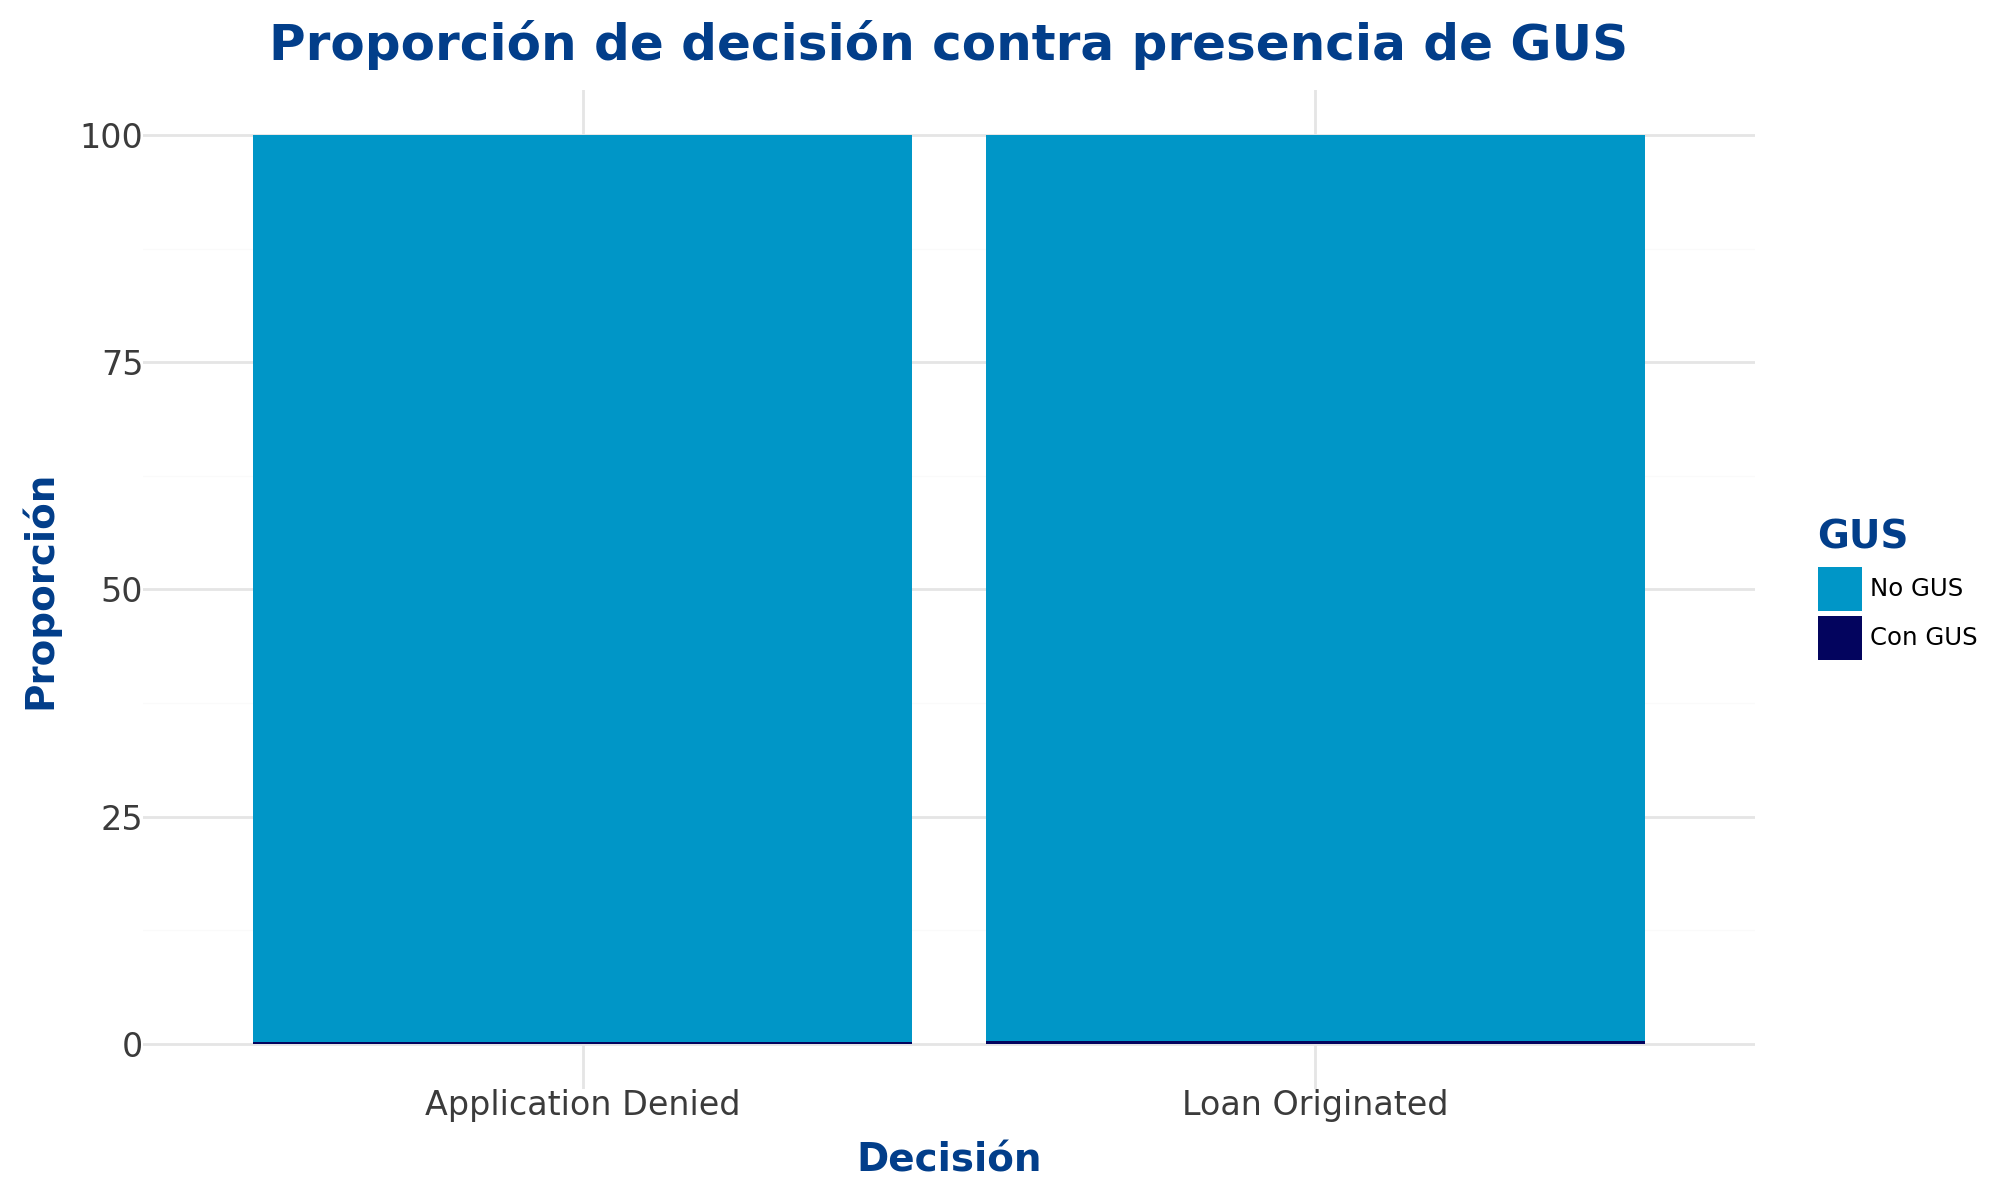

In [363]:
from plotnine import (
    ggplot, aes, geom_bar, scale_fill_manual, labs, theme, element_text, theme_minimal
)
import pandas as pd

blue_palette = ['#0096c7', '#03045e']

bar_plot_gus = (
    ggplot(Dataset, aes(x='factor(action_taken)', fill='factor(aus_GUS)'))
    + geom_bar(position='stack', show_legend=True)  
    + scale_fill_manual(
        values=blue_palette,  
        labels=["No GUS", "Con GUS"]
    )
    + labs(
        title="Gráfico de barras decisión contra presencia de GUS", 
        x="Decisión", 
        y="Frecuencia", 
        fill='GUS'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),  
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),  
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'), 
        axis_text=element_text(size=12, color='#3B3B3B'),  
        legend_title=element_text(size=14, weight='bold', color='#023e8a'), 
        legend_position='right',  
        legend_background=element_text(alpha=0),  
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

proportion_plot_gus = (
    ggplot(to_proportions(Dataset, 'action_taken', 'aus_GUS'), 
           aes(x='factor(action_taken)', y='proportion', fill='factor(aus_GUS)'))
    + geom_bar(stat='identity', position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette,
        labels=["No GUS", "Con GUS"]
    )
    + labs(
        title="Proporción de decisión contra presencia de GUS", 
        x="Decisión", 
        y="Proporción", 
        fill='GUS'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),  
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),  
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'), 
        axis_text=element_text(size=12, color='#3B3B3B'),  
        legend_title=element_text(size=14, weight='bold', color='#023e8a'), 
        legend_position='right', 
        legend_background=element_text(alpha=0),  
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

print(bar_plot_gus)
print(proportion_plot_gus)


Los gráficos presentados ofrecen una comparación visual de la relación entre la acción tomada (`action_taken`) y la presencia del sistema de puntuación automatizado GUS (`aus_GUS`).

- **Gráfico de barras acción contra presencia de GUS:** Este gráfico de barras apiladas muestra la distribución de aprobaciones (`Loan Originated`) y denegaciones de préstamos (`Application Denied`) en función de la presencia o ausencia de GUS. La mayoría de los préstamos originados corresponden a la ausencia de GUS (barra azul clara), mientras que tanto las aprobaciones como las denegaciones que involucran GUS (barra azul oscura) son mínimas. Esto indica que el uso de GUS no es común en el proceso de originación de préstamos o tiene poca influencia en la decisión final.

- **Proporción de acción contra presencia de GUS:** Este gráfico de proporciones muestra la misma relación, pero expresada como proporción en lugar de conteo. Podemos ver que, en ambos casos (préstamos aprobados y denegados), la proporción de instancias donde GUS está presente es mínima en comparación con la ausencia de GUS. Esto refuerza la idea de que la presencia de GUS tiene un impacto limitado en la determinación del resultado de la solicitud del préstamo.

##### **Variable Total Units**
El término "total de unidades" se refiere al número total de unidades residenciales en todas las propiedades que garantizan un préstamo cubierto bajo la Ley de Transparencia en la Vivienda (HMDA, por sus siglas en inglés). Especifica cuántas unidades de vivienda están relacionadas con el préstamo que se reporta.


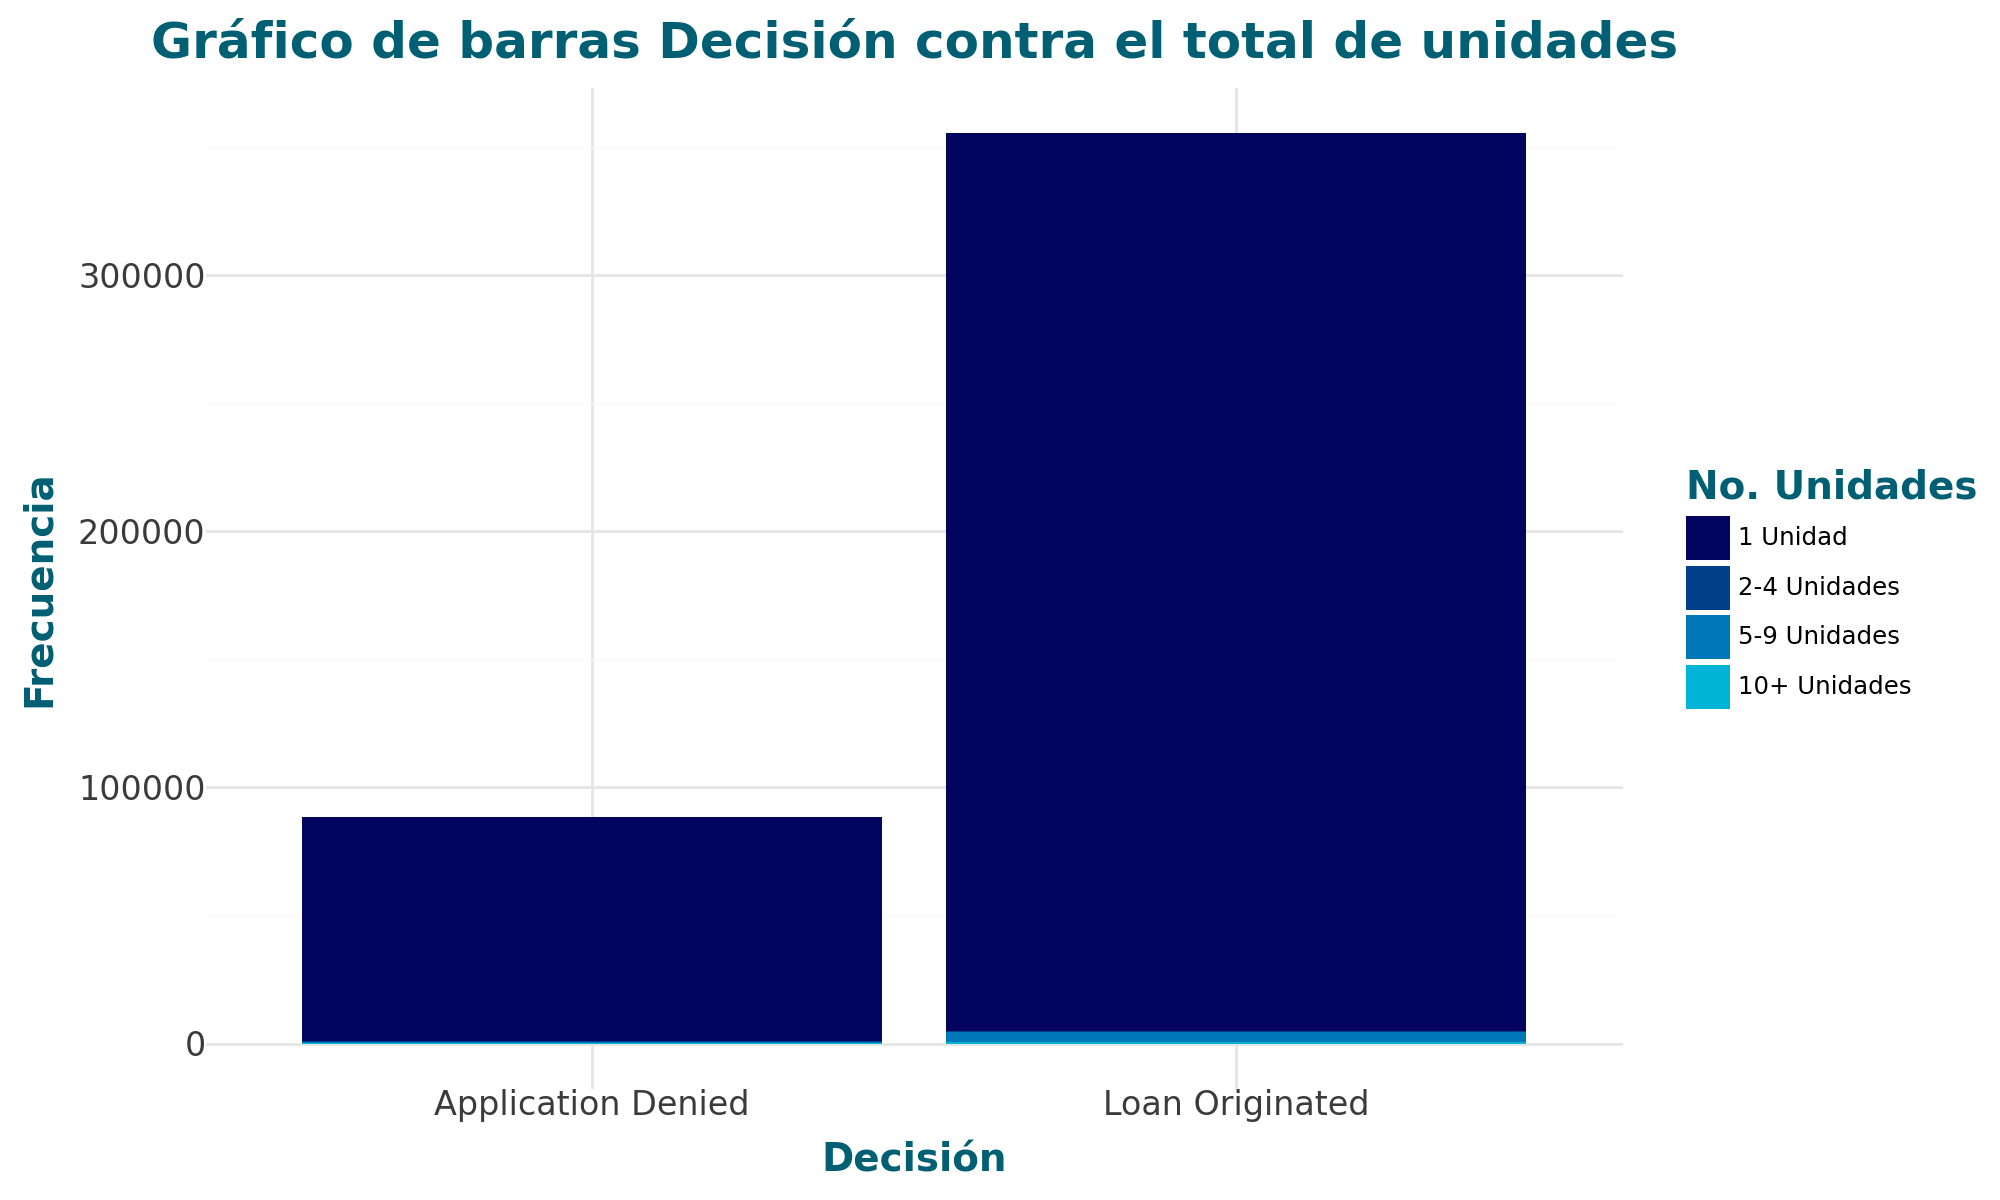

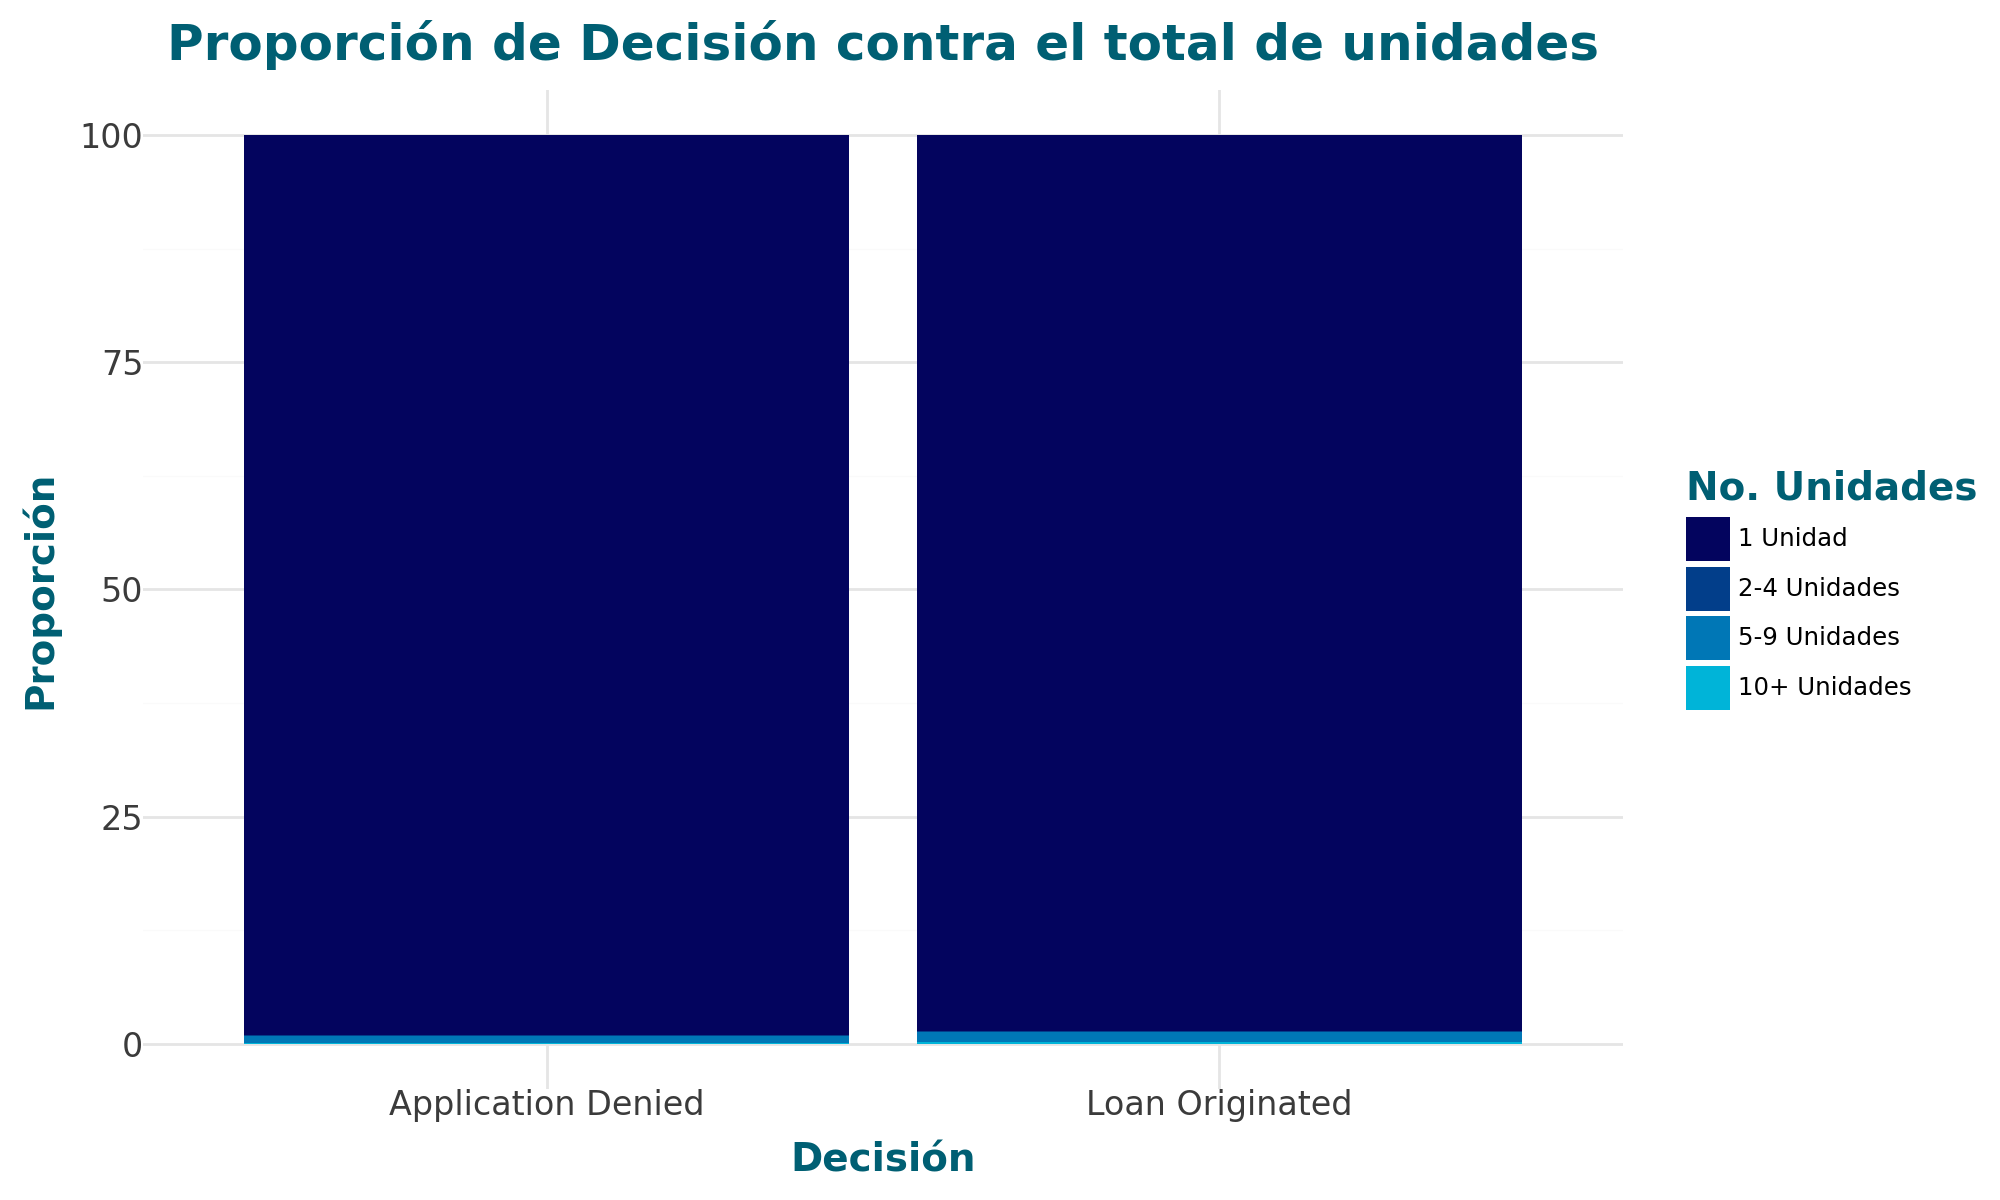

In [364]:
from plotnine import (
    ggplot, aes, geom_bar, scale_fill_manual, labs, theme, element_text, theme_minimal
)
import pandas as pd

unit_mapping = {
    '1': '1 Unidad',
    '2': '2-4 Unidades',
    '4': '2-4 Unidades',
    '5-24': '5-9 Unidades'
}

Dataset['total_units_mapped'] = Dataset['total_units'].astype(str).map(unit_mapping).fillna('10+ Unidades')

blue_palette_units = ['#03045e', '#023e8a', '#0077b6', '#00b4d8']

bar_plot_units = (
    ggplot(Dataset, aes(x='factor(action_taken)', fill='factor(total_units_mapped)'))
    + geom_bar(position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette_units,
        labels=["1 Unidad", "2-4 Unidades", "5-9 Unidades", "10+ Unidades"]
    )
    + labs(
        title="Gráfico de barras Decisión contra el total de unidades",
        x="Decisión",
        y="Frecuencia",
        fill='No. Unidades'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#005f73'),
        axis_title_x=element_text(size=14, weight='bold', color='#005f73'),
        axis_title_y=element_text(size=14, weight='bold', color='#005f73'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#005f73'),
        legend_position='right',  
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

df_proportions = to_proportions(Dataset, 'action_taken', 'total_units_mapped')

proportion_plot_units = (
    ggplot(df_proportions,
           aes(x='factor(action_taken)', y='proportion', fill='factor(total_units_mapped)'))
    + geom_bar(stat='identity', position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette_units,
        labels=["1 Unidad", "2-4 Unidades", "5-9 Unidades", "10+ Unidades"]
    )
    + labs(
        title="Proporción de Decisión contra el total de unidades",
        x="Decisión",
        y="Proporción",
        fill='No. Unidades'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#005f73'),
        axis_title_x=element_text(size=14, weight='bold', color='#005f73'),
        axis_title_y=element_text(size=14, weight='bold', color='#005f73'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#005f73'),
        legend_position='right', 
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

print(bar_plot_units)
print(proportion_plot_units)


En los gráficos presentados se analiza la relación entre la variable de decisión (`action_taken`) y el número de unidades totales (`total_units`). El primer gráfico de barras muestra el conteo de solicitudes de préstamos aprobadas y denegadas según las distintas categorías de unidades totales. Se observa que la mayoría de los préstamos, tanto aprobados como denegados, están asociados con un número bajo de unidades, indicando que la variable total_units está dominada por préstamos de propiedades con un menor número de unidades.

El segundo gráfico, que presenta la proporción de decisiones según el número de unidades, revela que, independientemente de la decisión de aprobar o denegar el préstamo, la distribución entre las categorías de `total_units` permanece casi constante. Esto sugiere que el número de unidades no tiene una influencia notable en la decisión de aprobar o rechazar un préstamo, aunque sigue siendo predominante el segmento de una unidad. 

##### **Varible Conforming Loan Limit**

Un límite de préstamo conforme es el monto máximo que un préstamo hipotecario puede tener para ser considerado "conforme". Esto significa que el préstamo debe cumplir con los límites establecidos por la Agencia Federal de Financiamiento de la Vivienda (FHFA) y los criterios de financiación de Fannie Mae y Freddie Mac. 



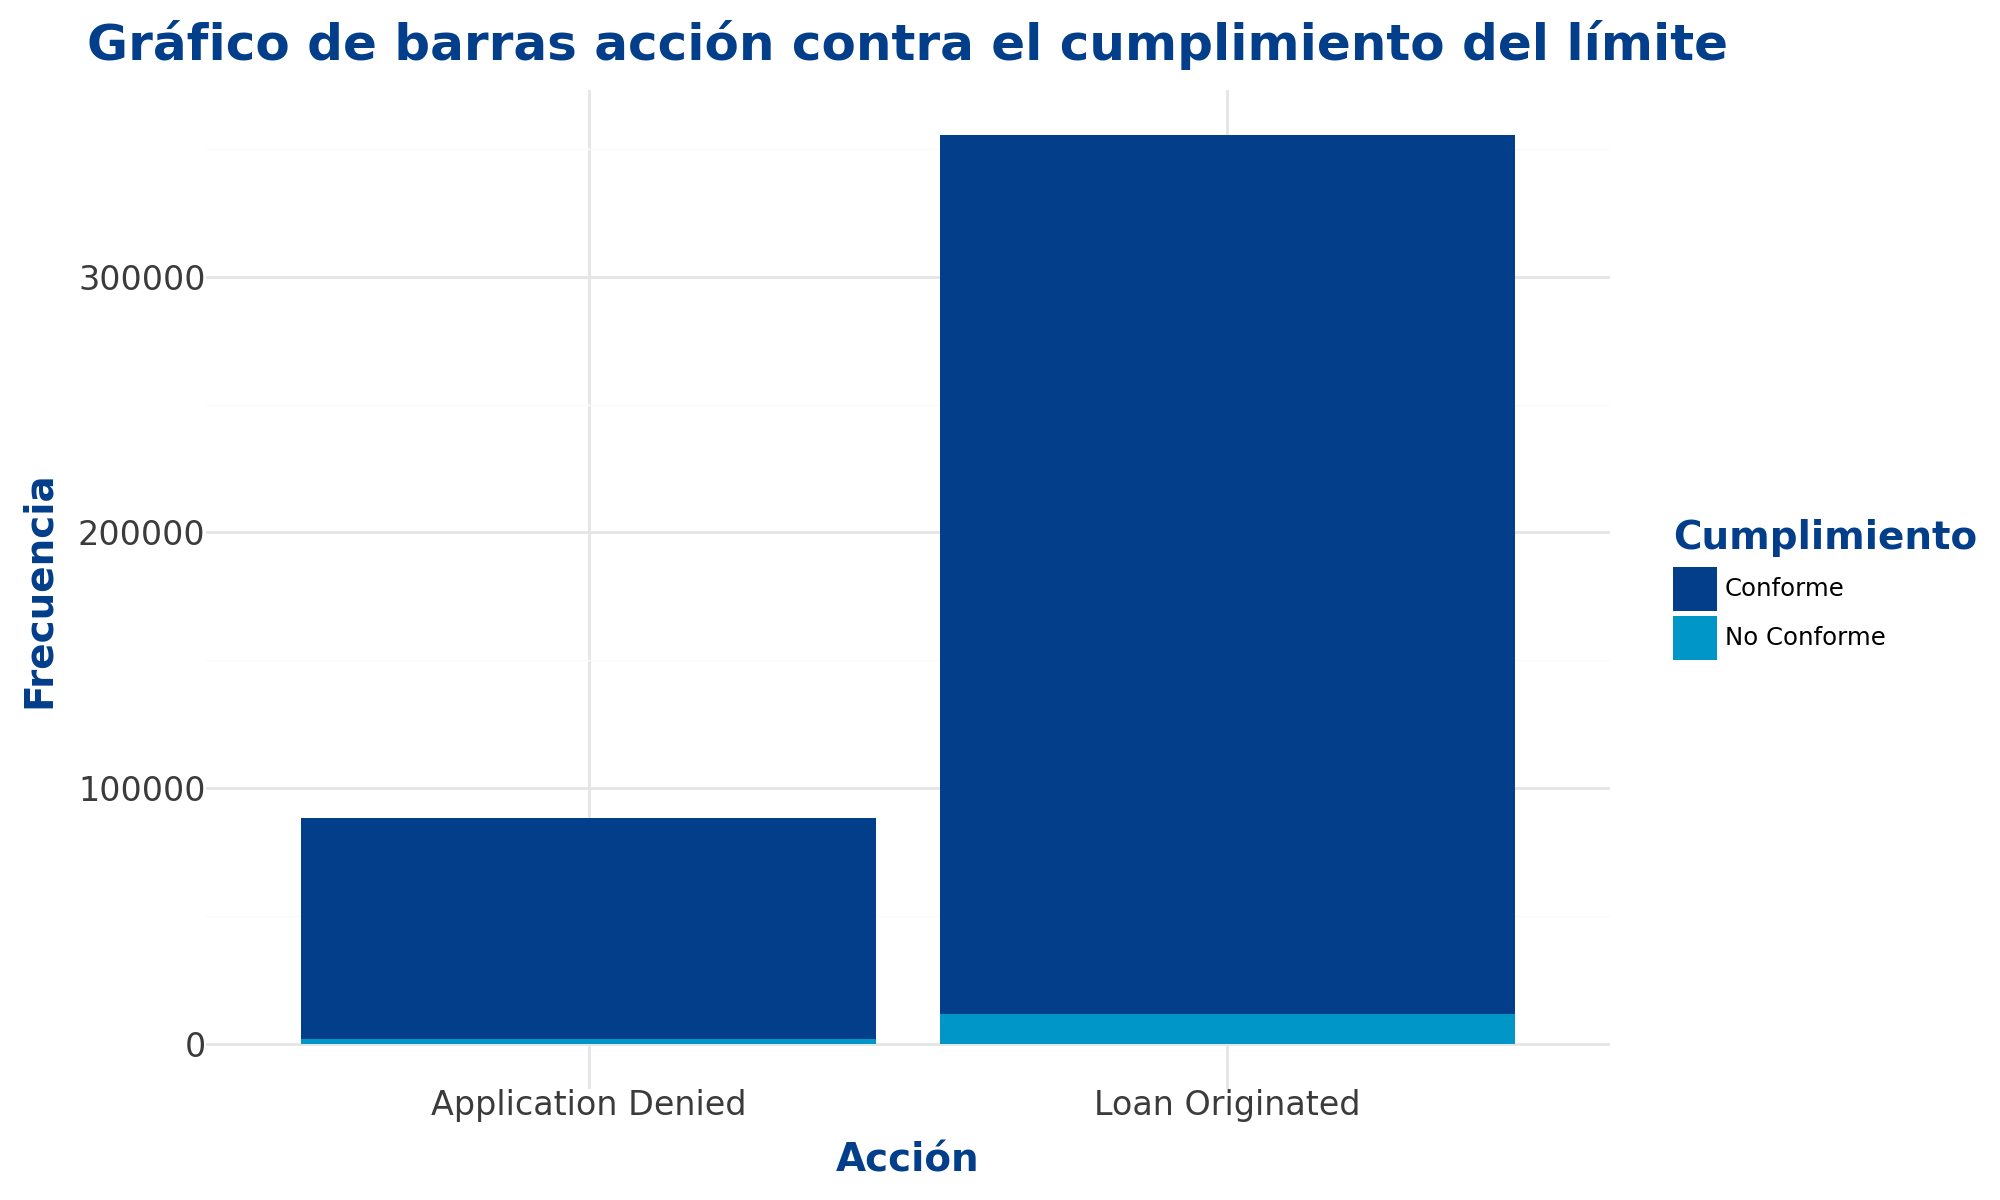

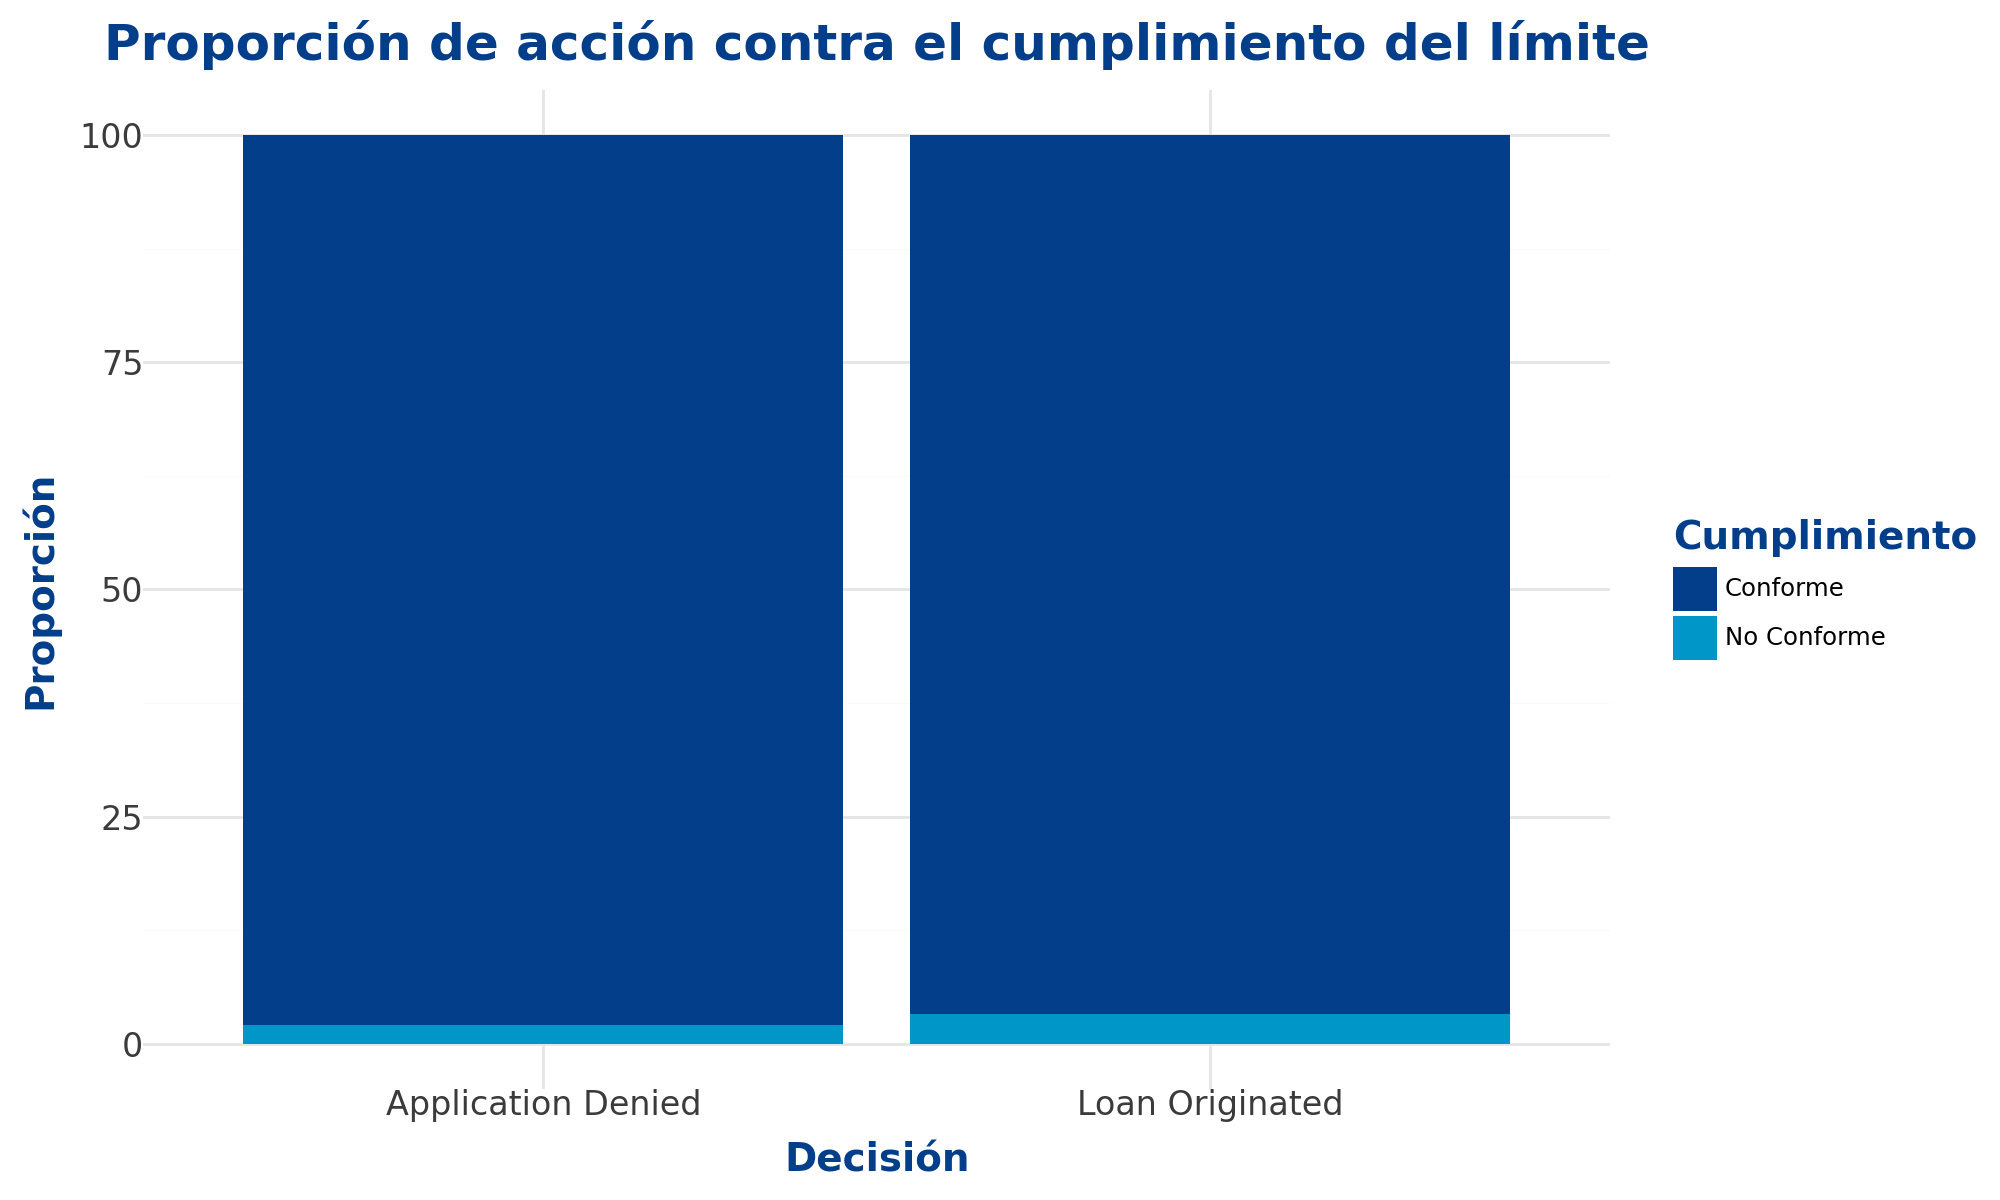

In [365]:
from plotnine import (
    ggplot, aes, geom_bar, scale_fill_manual, labs, theme, element_text, theme_minimal
)

blue_palette_limit = ['#023e8a', '#0096c7']

Data = Dataset.dropna(subset=['conforming_loan_limit'])  
Data['conforming_loan_limit'] = Data['conforming_loan_limit'].astype(str)  

bar_plot_limit = (
    ggplot(Dataset, aes(x='factor(action_taken)', fill='factor(conforming_loan_limit)'))
    + geom_bar(position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette_limit,
        labels=["Conforme", "No Conforme"]  
    )
    + labs(
        title="Gráfico de barras acción contra el cumplimiento del límite",
        x="Acción",
        y="Frecuencia",
        fill='Cumplimiento'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#023e8a'),
        legend_position='right',  
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

df_proportions_limit = to_proportions(Dataset, 'action_taken', 'conforming_loan_limit')
df_proportions_limit['conforming_loan_limit'] = df_proportions_limit['conforming_loan_limit'].astype(str)  

proportion_plot_limit = (
    ggplot(df_proportions_limit,
           aes(x='factor(action_taken)', y='proportion', fill='factor(conforming_loan_limit)'))
    + geom_bar(stat='identity', position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette_limit,
        labels=["Conforme", "No Conforme"]  
    )
    + labs(
        title="Proporción de acción contra el cumplimiento del límite",
        x="Decisión",
        y="Proporción",
        fill='Cumplimiento'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#023e8a'),
        legend_position='right',  
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

print(bar_plot_limit)
print(proportion_plot_limit)



Los dos gráficos muestran la relación entre la decisión de aprobar o denegar un préstamo y el cumplimiento del límite de préstamo conforme (`conforming_loan_limit`). El primer gráfico ilustra la distribución de los préstamos aprobados y denegados en función de si cumplen o no con el límite conforme. Es evidente que la mayoría de los préstamos aprobados están dentro del límite conforme, mientras que una proporción relativamente pequeña de los préstamos aprobados no cumplen con este límite.

El segundo gráfico muestra las proporciones de decisiones de préstamos con respecto al cumplimiento del límite. A través de este gráfico, se observa que tanto para los préstamos aprobados como para los denegados, la proporción de aquellos que cumplen con el límite conforme es significativamente mayor. Esta visualización refuerza la idea de que cumplir con el límite de préstamo conforme es un factor relevante en la aprobación de préstamos.

##### **Variable preapproval**
La preaprobación según el HMDA (Home Mortgage Disclosure Act) es considerada una solicitud de préstamo que debe ser reportada por los prestamistas hipotecarios. Esto significa que el prestamista tiene programas de preaprobación donde deben informar las solicitudes que son aprobadas o denegadas. Una preaprobación se utiliza principalmente para la compra de una vivienda, como en este caso. 

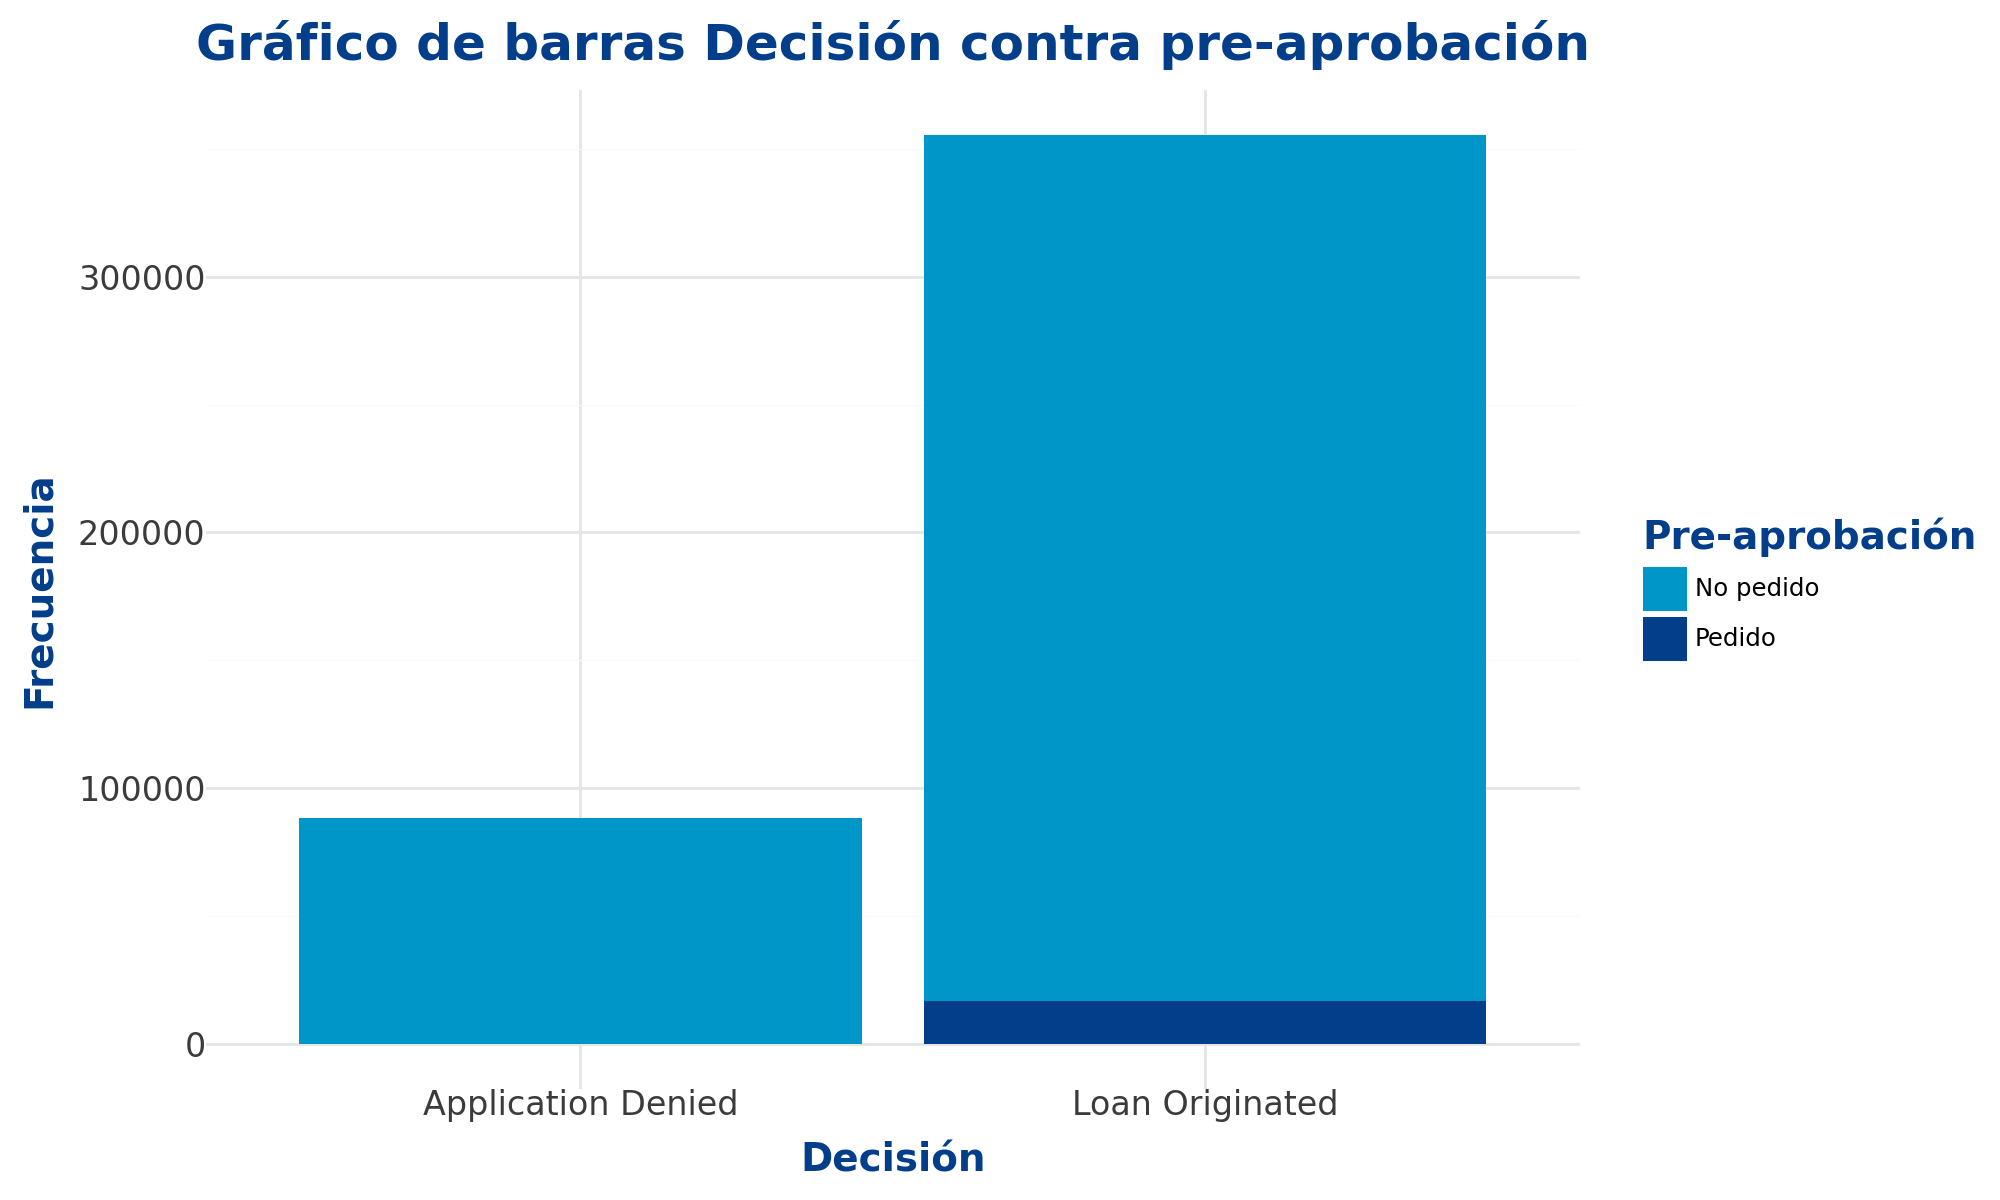

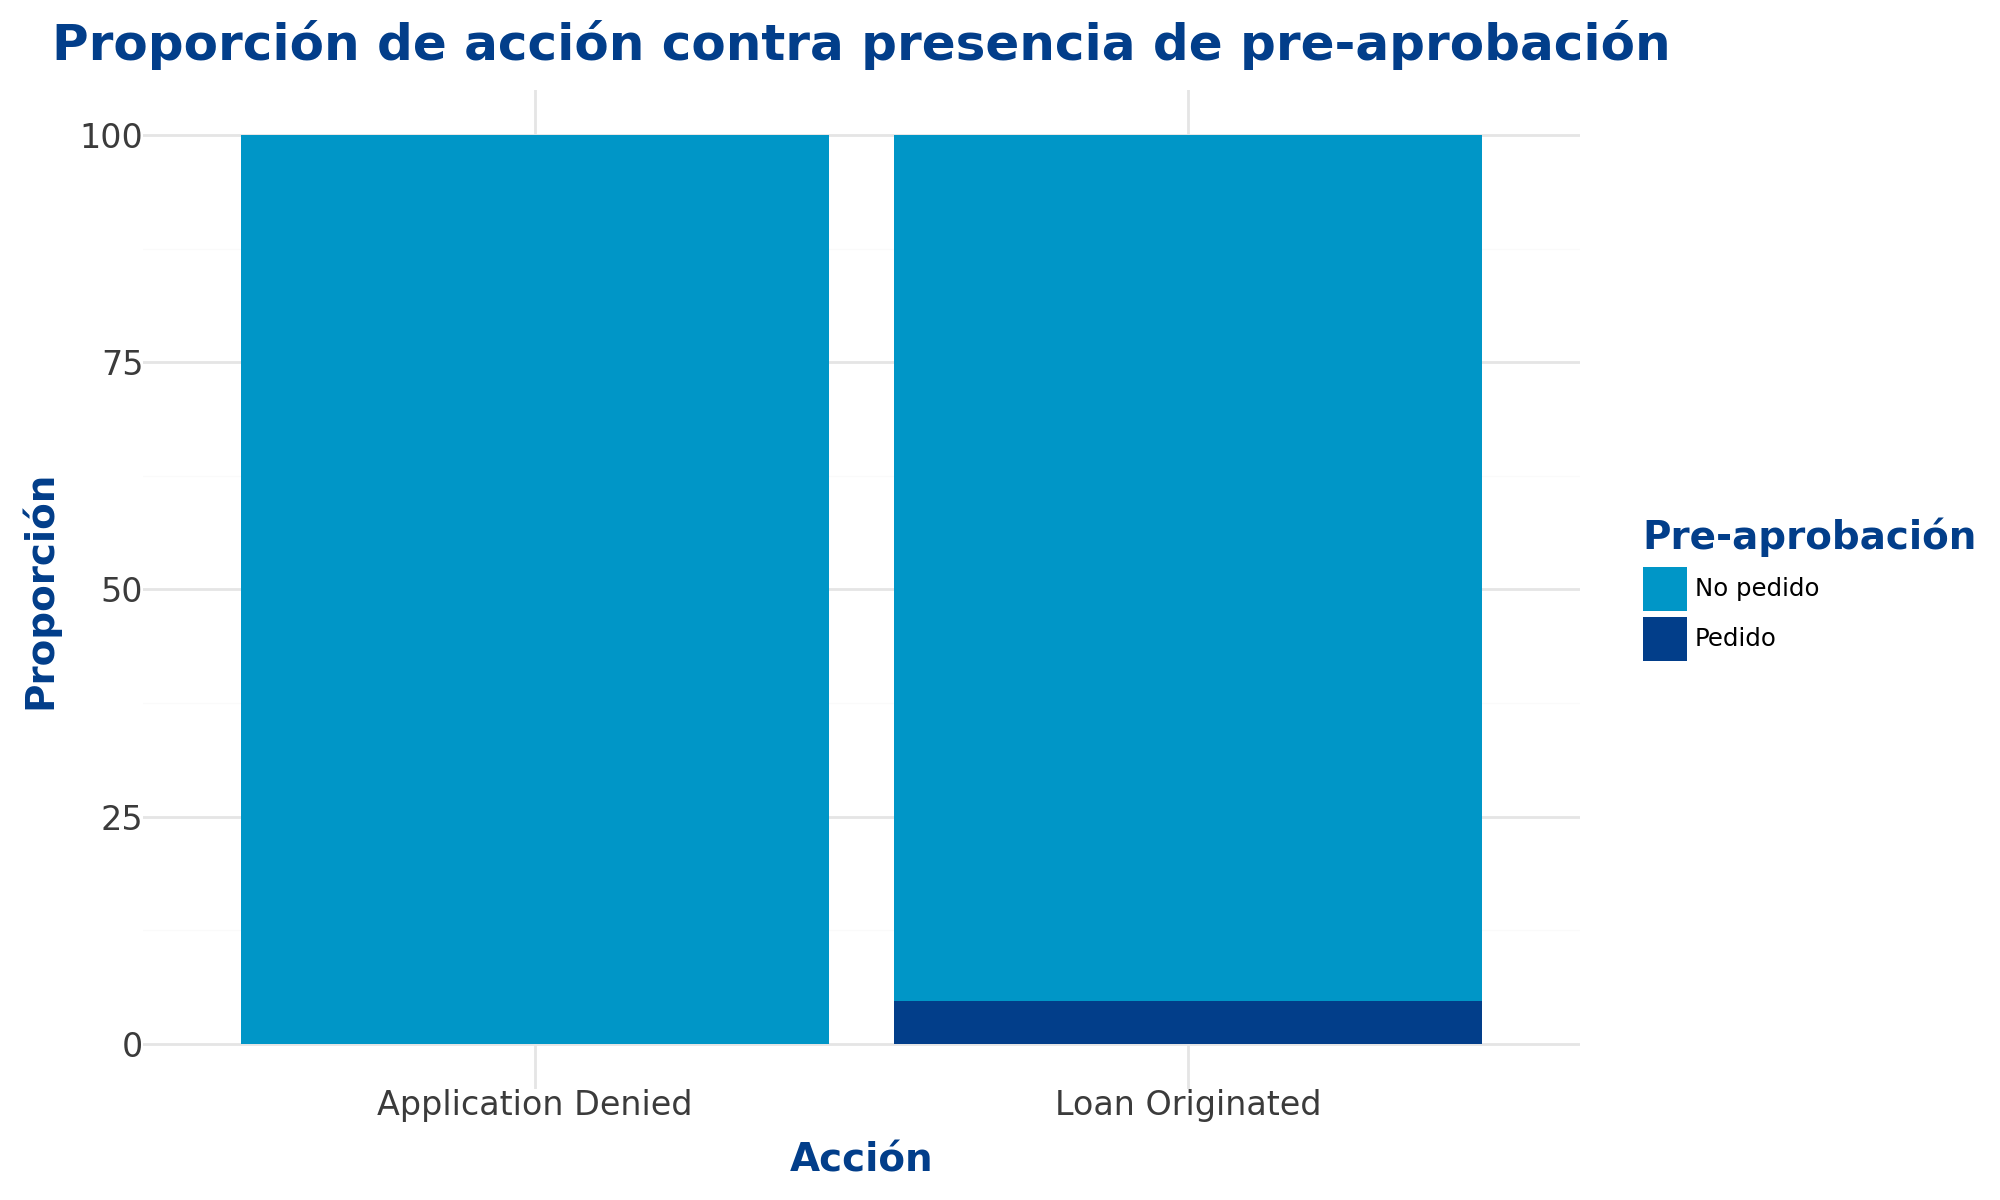

In [366]:
from plotnine import (
    ggplot, aes, geom_bar, scale_fill_manual, labs, theme, element_text, theme_minimal
)

blue_palette_preapproval = ['#0096c7', '#023e8a']  # Paleta de colores en azul

Dataset['preapproval'] = Dataset['preapproval'].astype(str)  # Convertir a string si no lo está

bar_plot_preapproval = (
    ggplot(Dataset, aes(x='factor(action_taken)', fill='factor(preapproval)'))
    + geom_bar(position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette_preapproval,
        labels=["No pedido", "Pedido"]  
    )
    + labs(
        title="Gráfico de barras Decisión contra pre-aprobación",
        x="Decisión",
        y="Frecuencia",
        fill='Pre-aprobación'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#023e8a'),
        legend_position='right',  
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical' 
    )
)

df_proportions_preapproval = to_proportions(Dataset, 'action_taken', 'preapproval')
df_proportions_preapproval['preapproval'] = df_proportions_preapproval['preapproval'].astype(str)  # Convertir a string si no lo está

proportion_plot_preapproval = (
    ggplot(df_proportions_preapproval,
           aes(x='factor(action_taken)', y='proportion', fill='factor(preapproval)'))
    + geom_bar(stat='identity', position='stack', show_legend=True)
    + scale_fill_manual(
        values=blue_palette_preapproval,
        labels=["No pedido", "Pedido"]  
    )
    + labs(
        title="Proporción de acción contra presencia de pre-aprobación",
        x="Acción",
        y="Proporción",
        fill='Pre-aprobación'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#023e8a'),
        legend_position='right', 
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

print(bar_plot_preapproval)
print(proportion_plot_preapproval)


#### **Variables Cuantitativas**

##### **Variable Loan Amount**
El monto del préstamo se refiere a la cantidad total de dinero que un prestatario recibe de un prestamista, que deberá pagarse en un plazo acordado, generalmente con intereses. 

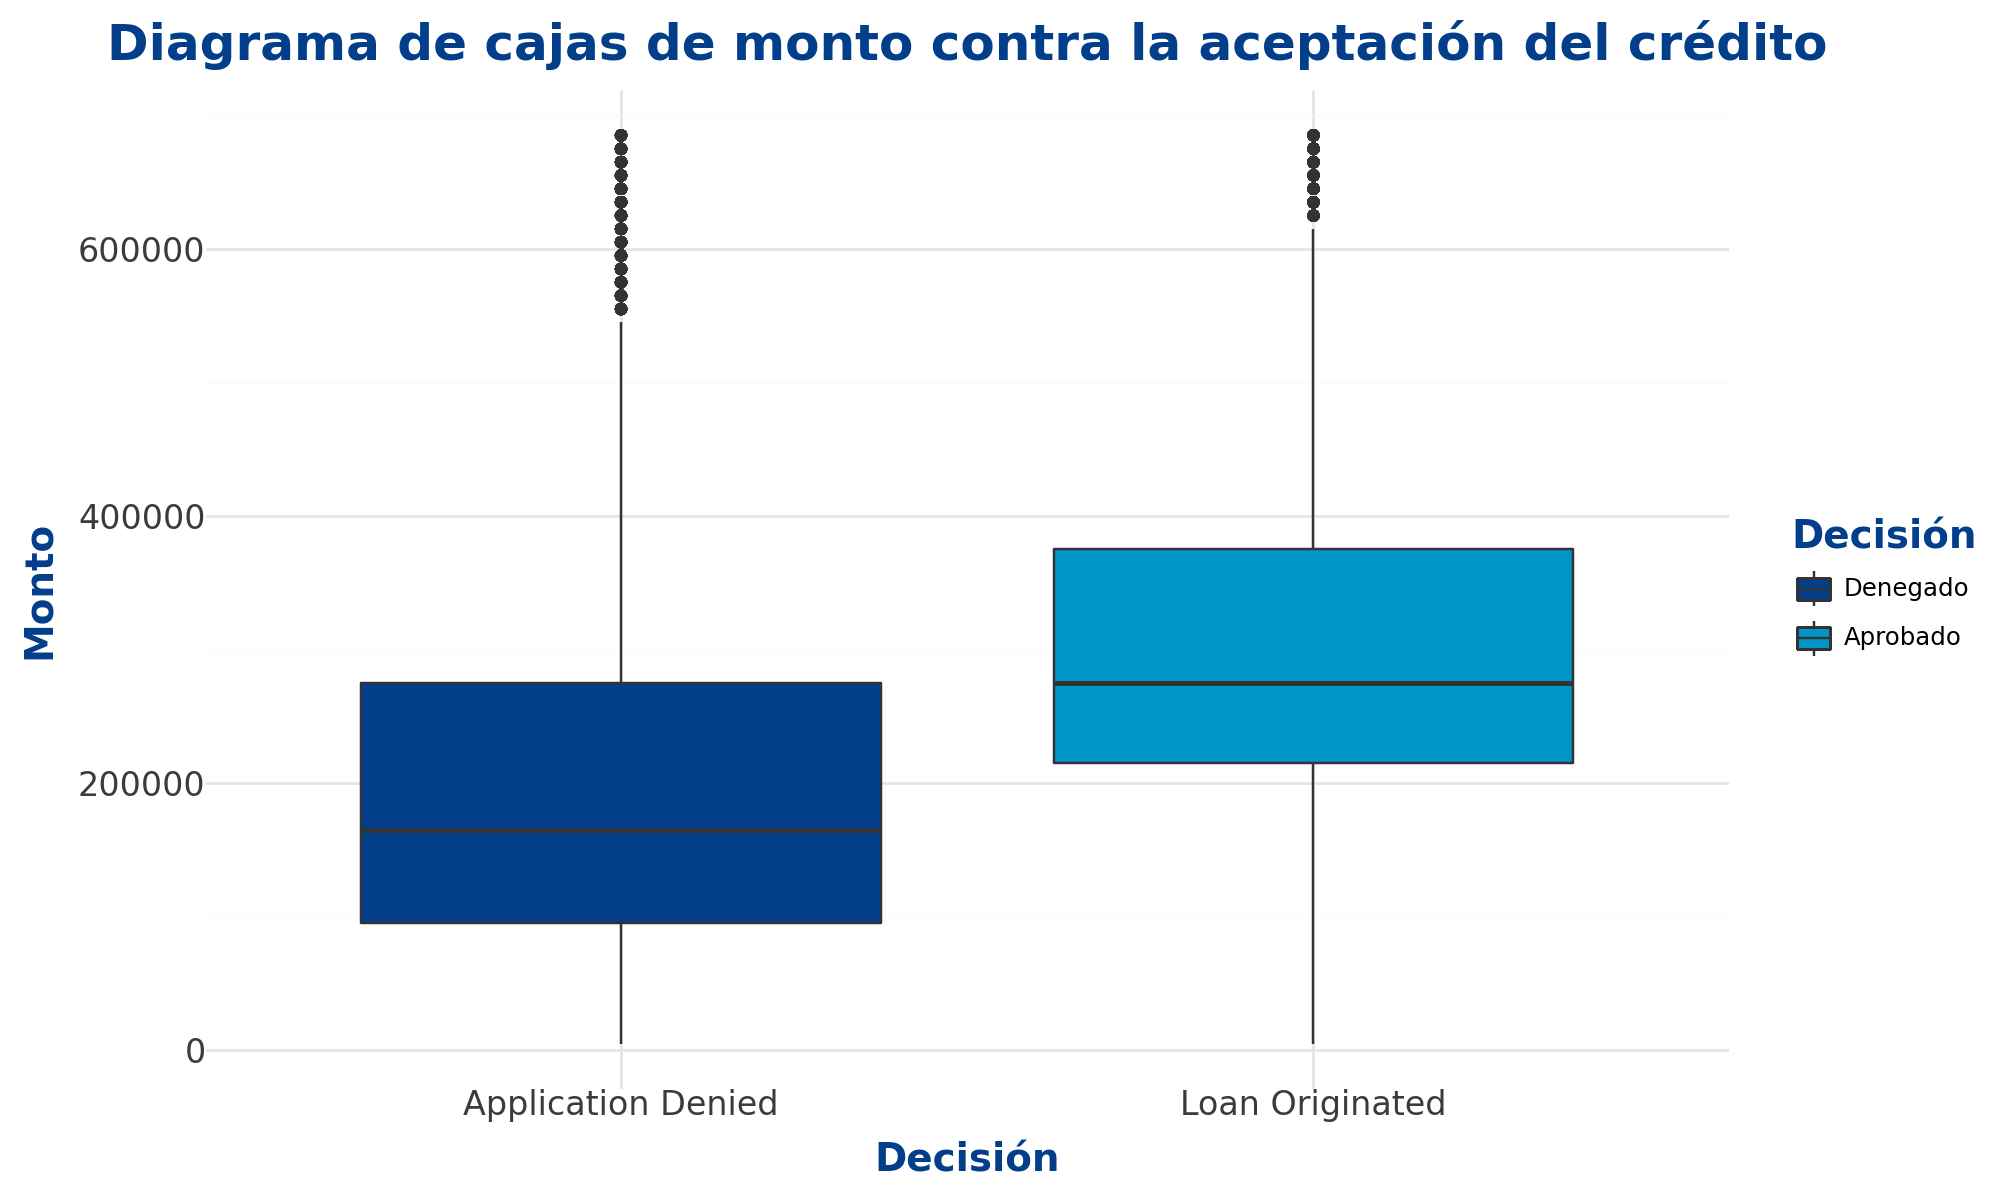

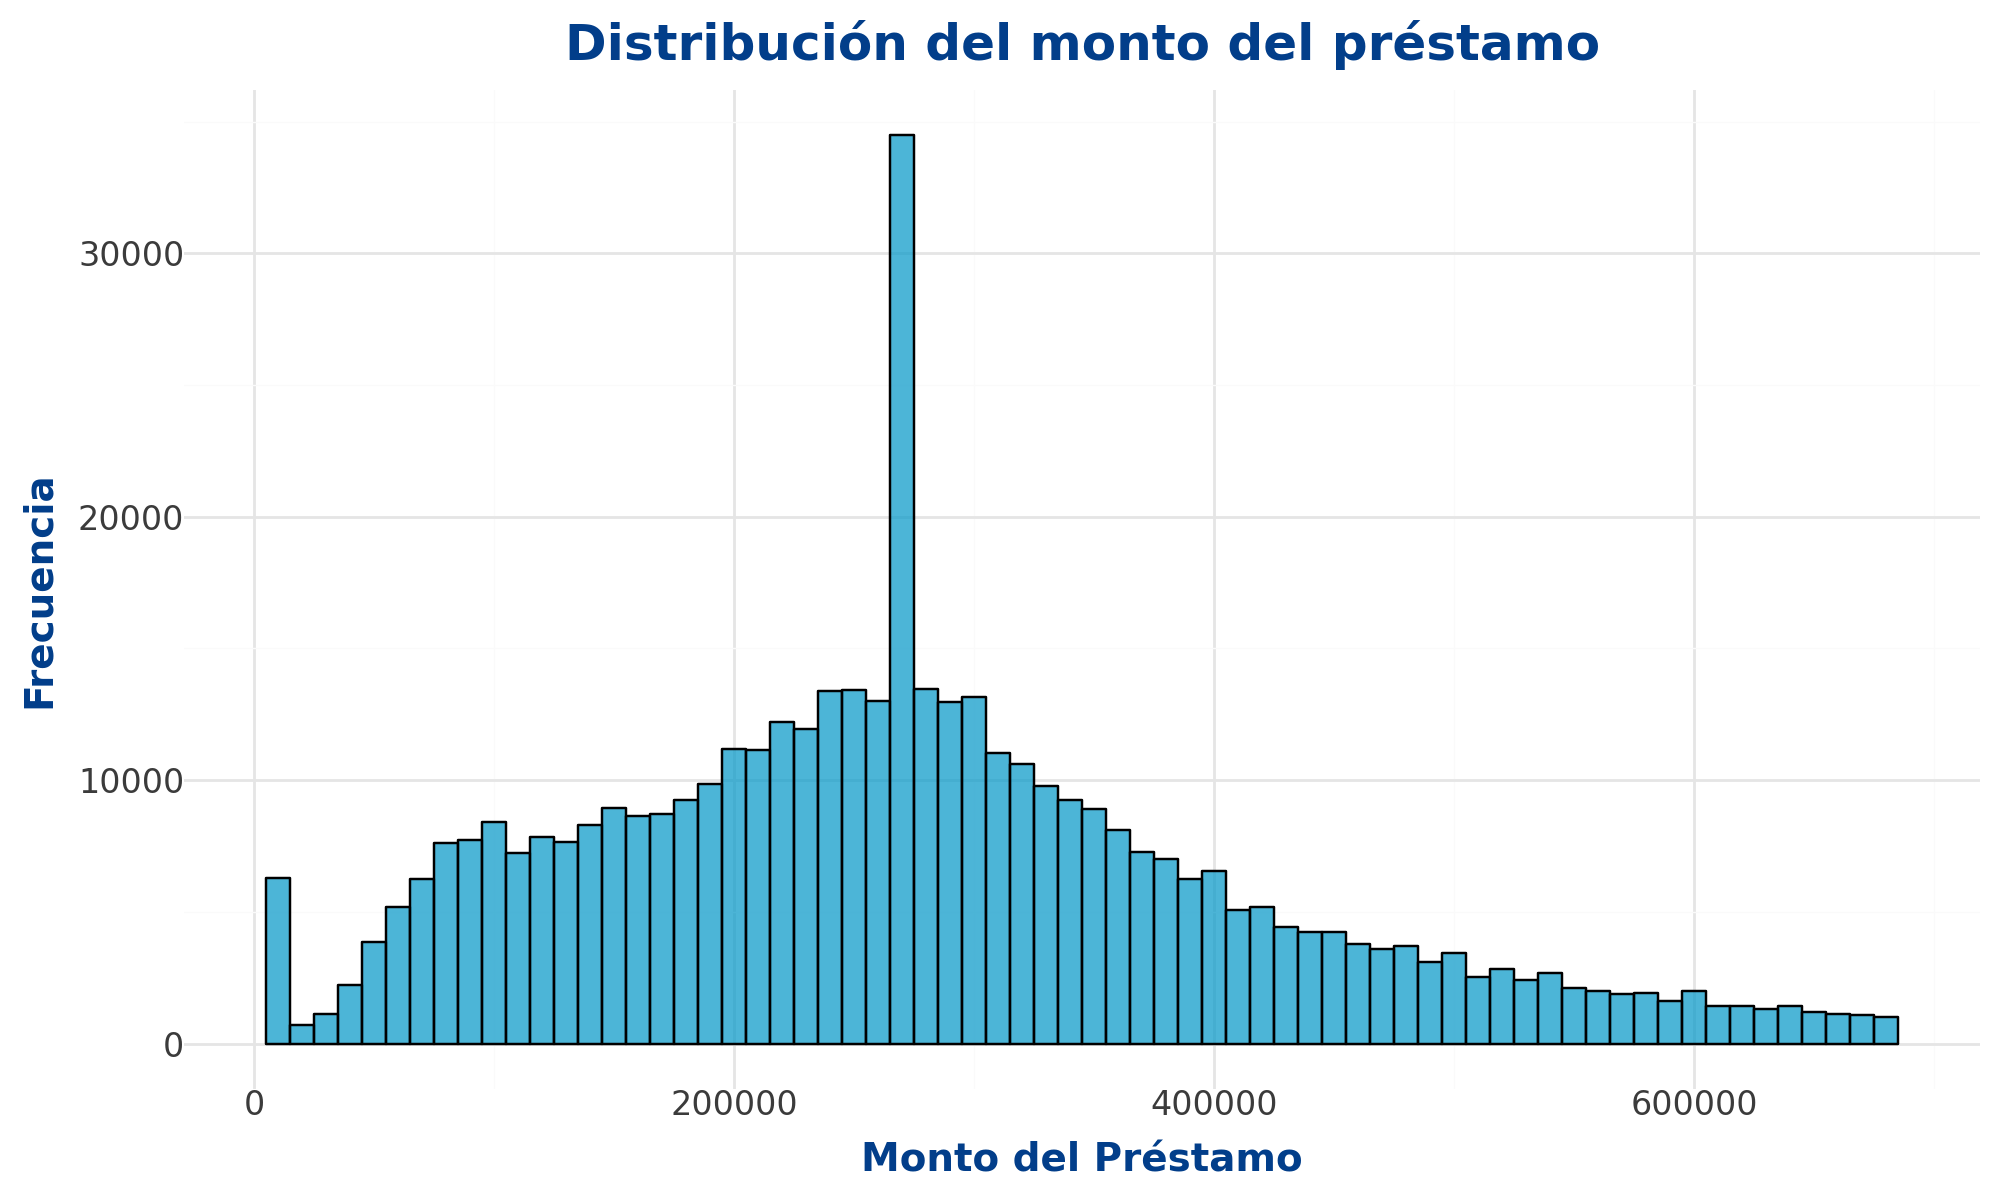

In [367]:
from plotnine import (
    ggplot, aes, geom_boxplot, geom_histogram, scale_fill_manual, labs, theme, element_text, theme_minimal
)

blue_palette_loan = ['#023e8a', '#0096c7']

boxplot_loan = (
    ggplot(Dataset, aes(x='factor(action_taken)', y='loan_amount', fill='factor(action_taken)'))
    + geom_boxplot(show_legend=True)
    + scale_fill_manual(
        values=blue_palette_loan,
        labels=["Denegado", "Aprobado"]
    )
    + labs(
        title='Diagrama de cajas de monto contra la aceptación del crédito',
        x='Decisión', 
        y='Monto',
        fill='Decisión'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#023e8a'),
        legend_position='right',  
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

histogram_loan = (
    ggplot(Dataset, aes(x='loan_amount'))
    + geom_histogram(binwidth=10000, fill='#0096c7', color='black', alpha=0.7)
    + labs(
        title='Distribución del monto del préstamo',
        x='Monto del Préstamo', 
        y='Frecuencia'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'),
        axis_text=element_text(size=12, color='#3B3B3B')
    )
)

print(boxplot_loan)
print(histogram_loan)


En el primer gráfico, que es un diagrama de cajas, se observa la distribución del monto del préstamo en función de la decisión de aprobación del crédito. Se puede notar que los montos aprobados tienden a ser más altos en comparación con los montos denegados. Los préstamos aprobados presentan un rango intercuartílico más amplio y una mediana más alta, lo cual indica que el rango de los montos aprobados es mayor. Además, hay presencia de algunos valores atípicos en ambos casos, sugiriendo la existencia de préstamos inusualmente altos.

El segundo gráfico muestra la distribución de la variable del monto del préstamo a través de un histograma. La mayoría de los préstamos se concentran en montos menores a los \$300,000, con un pico significativo alrededor de los \$200,000. Esta distribución es sesgada a la derecha, lo que implica que, aunque la mayoría de los préstamos se encuentran en rangos bajos a moderados, hay una cantidad considerable de préstamos con montos mucho más altos, lo que podría influir en el análisis de riesgo de crédito.


##### **Variable Income**

El ingreso se refiere al dinero que se gana a través del trabajo o se recibe de inversiones. Los ingresos pueden provenir de diversas fuentes, ya sean salarios, sueldos, o ganancias obtenidas por la venta de productos o servicios. Cada tipo de ingreso también tiene regulaciones fiscales específicas.

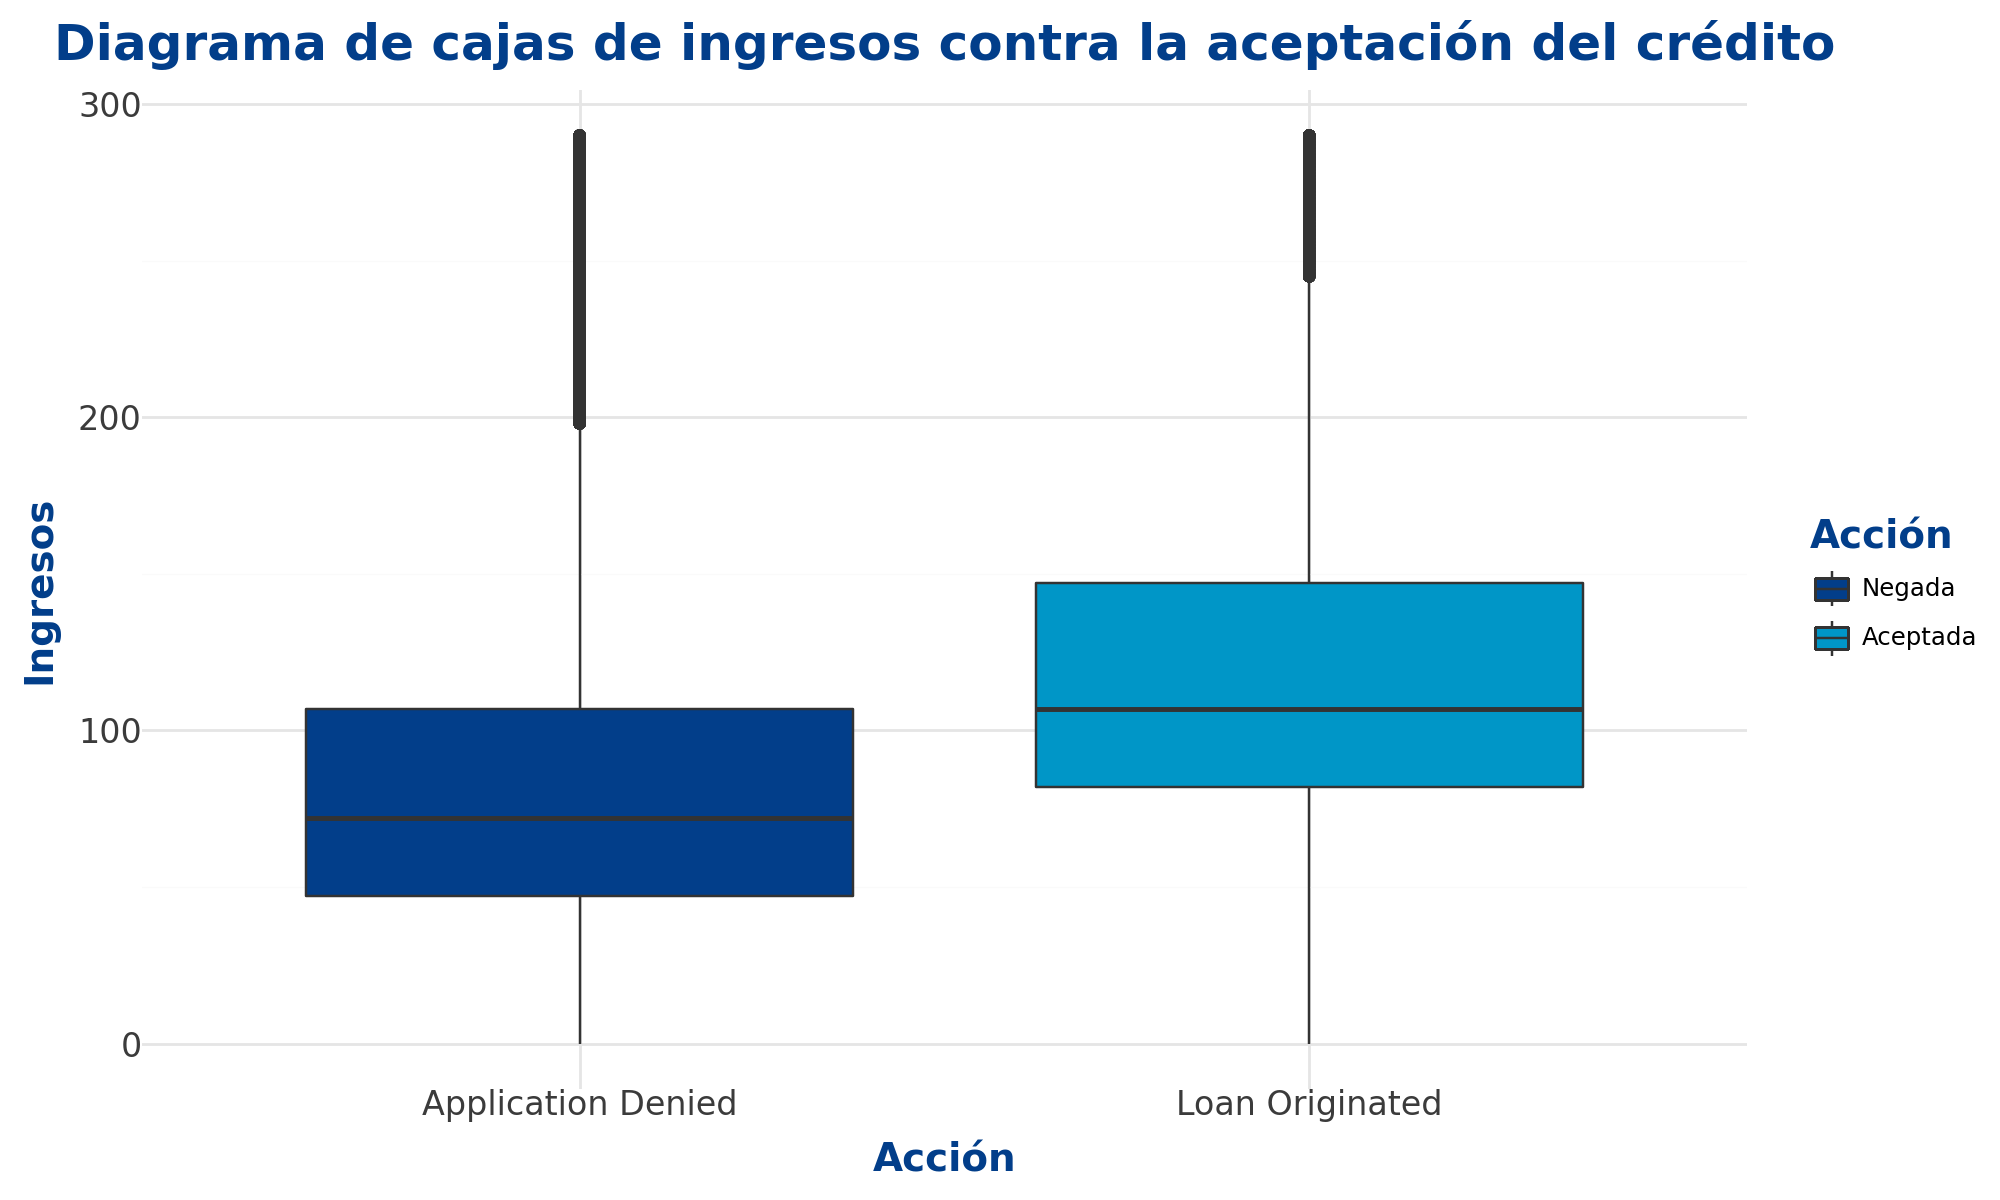

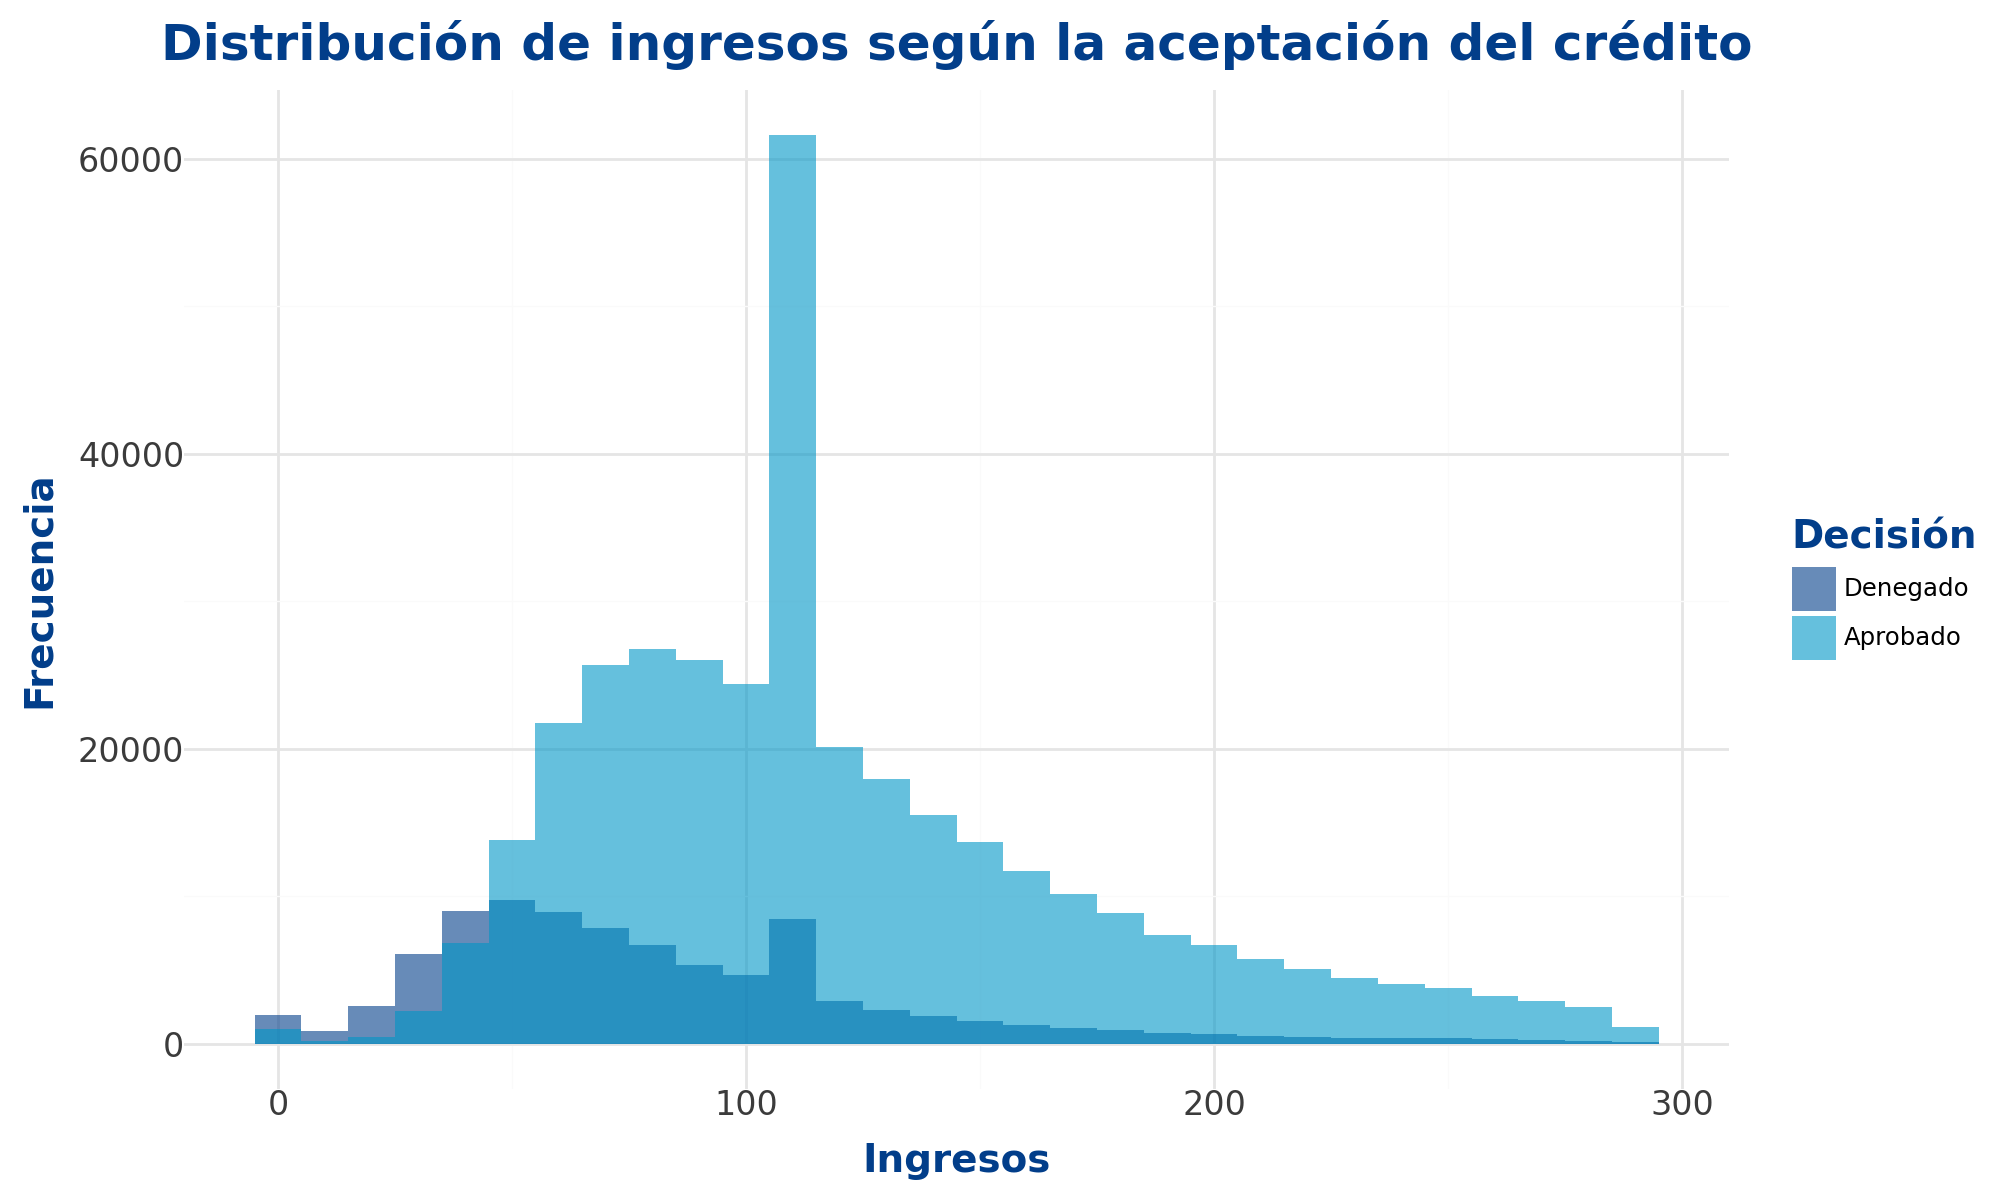

In [368]:
from plotnine import geom_histogram

blue_palette_income = ['#023e8a', '#0096c7']


histogram_income = (
    ggplot(Dataset, aes(x='income', fill='factor(action_taken)'))
    + geom_histogram(binwidth=10, position='identity', alpha=0.6)
    + scale_fill_manual(
        values=blue_palette_income,
        labels=["Denegado", "Aprobado"]
    )
    + labs(
        title='Distribución de ingresos según la aceptación del crédito',
        x='Ingresos',
        y='Frecuencia',
        fill='Decisión'
    )
    + theme_minimal()
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'),
        axis_text=element_text(size=12, color='#3B3B3B'),
        legend_title=element_text(size=14, weight='bold', color='#023e8a'),
        legend_position='right',  
        legend_background=element_text(alpha=0),
        legend_box_margin=0,
        legend_box='vertical'
    )
)

boxplot_income = (
    ggplot(Dataset, aes(x='factor(action_taken)', y='income', fill='factor(action_taken)'))
    + geom_boxplot(show_legend=True)  
    + scale_fill_manual(
        values=blue_palette_income,  
        labels=["Negada", "Aceptada"] 
    )
    + labs(
        title='Diagrama de cajas de ingresos contra la aceptación del crédito', 
        x='Acción', 
        y='Ingresos', 
        fill='Acción'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),  
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),  
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'), 
        axis_text=element_text(size=12, color='#3B3B3B'),  
        legend_title=element_text(size=14, weight='bold', color='#023e8a'), 
        legend_position='right',  
        legend_background=element_text(alpha=0),  
        legend_box_margin=0,
        legend_box='vertical'  
    )
)

print(boxplot_income)

print(histogram_income)


En los gráficos presentados se analiza la relación entre los ingresos del solicitante y la decisión del crédito. El primer gráfico, un diagrama de cajas, muestra que los ingresos medianos de los solicitantes con crédito aprobado (`Loan Originated`) son generalmente más altos que aquellos cuya solicitud fue denegada (`Application Denied`). Esto indica que a mayor ingreso, mayor probabilidad de aprobación del crédito.

El segundo gráfico se ilustra la distribución de los ingresos para cada grupo de decisión. Se observa que los ingresos más bajos están más concentrados en las solicitudes denegadas, mientras que los ingresos más altos tienen una mayor proporción de aprobaciones. Esto reafirma la tendencia observada en el primer gráfico de que los ingresos influyen significativamente en la decisión de aprobación del crédito.

##### **Variable FFIEC Family Income**

El término "ffiec_msa_md_median_family_income" se refiere al ingreso familiar medio (Median Family Income, MFI) según los datos del FFIEC (Federal Financial Institutions Examination Council). Este ingreso es ajustado anualmente y se correlaciona con los datos de solicitudes de préstamos en las áreas metropolitanas (MSA) y divisiones del mercado (MD) en las que se encuentra el tracto específico.

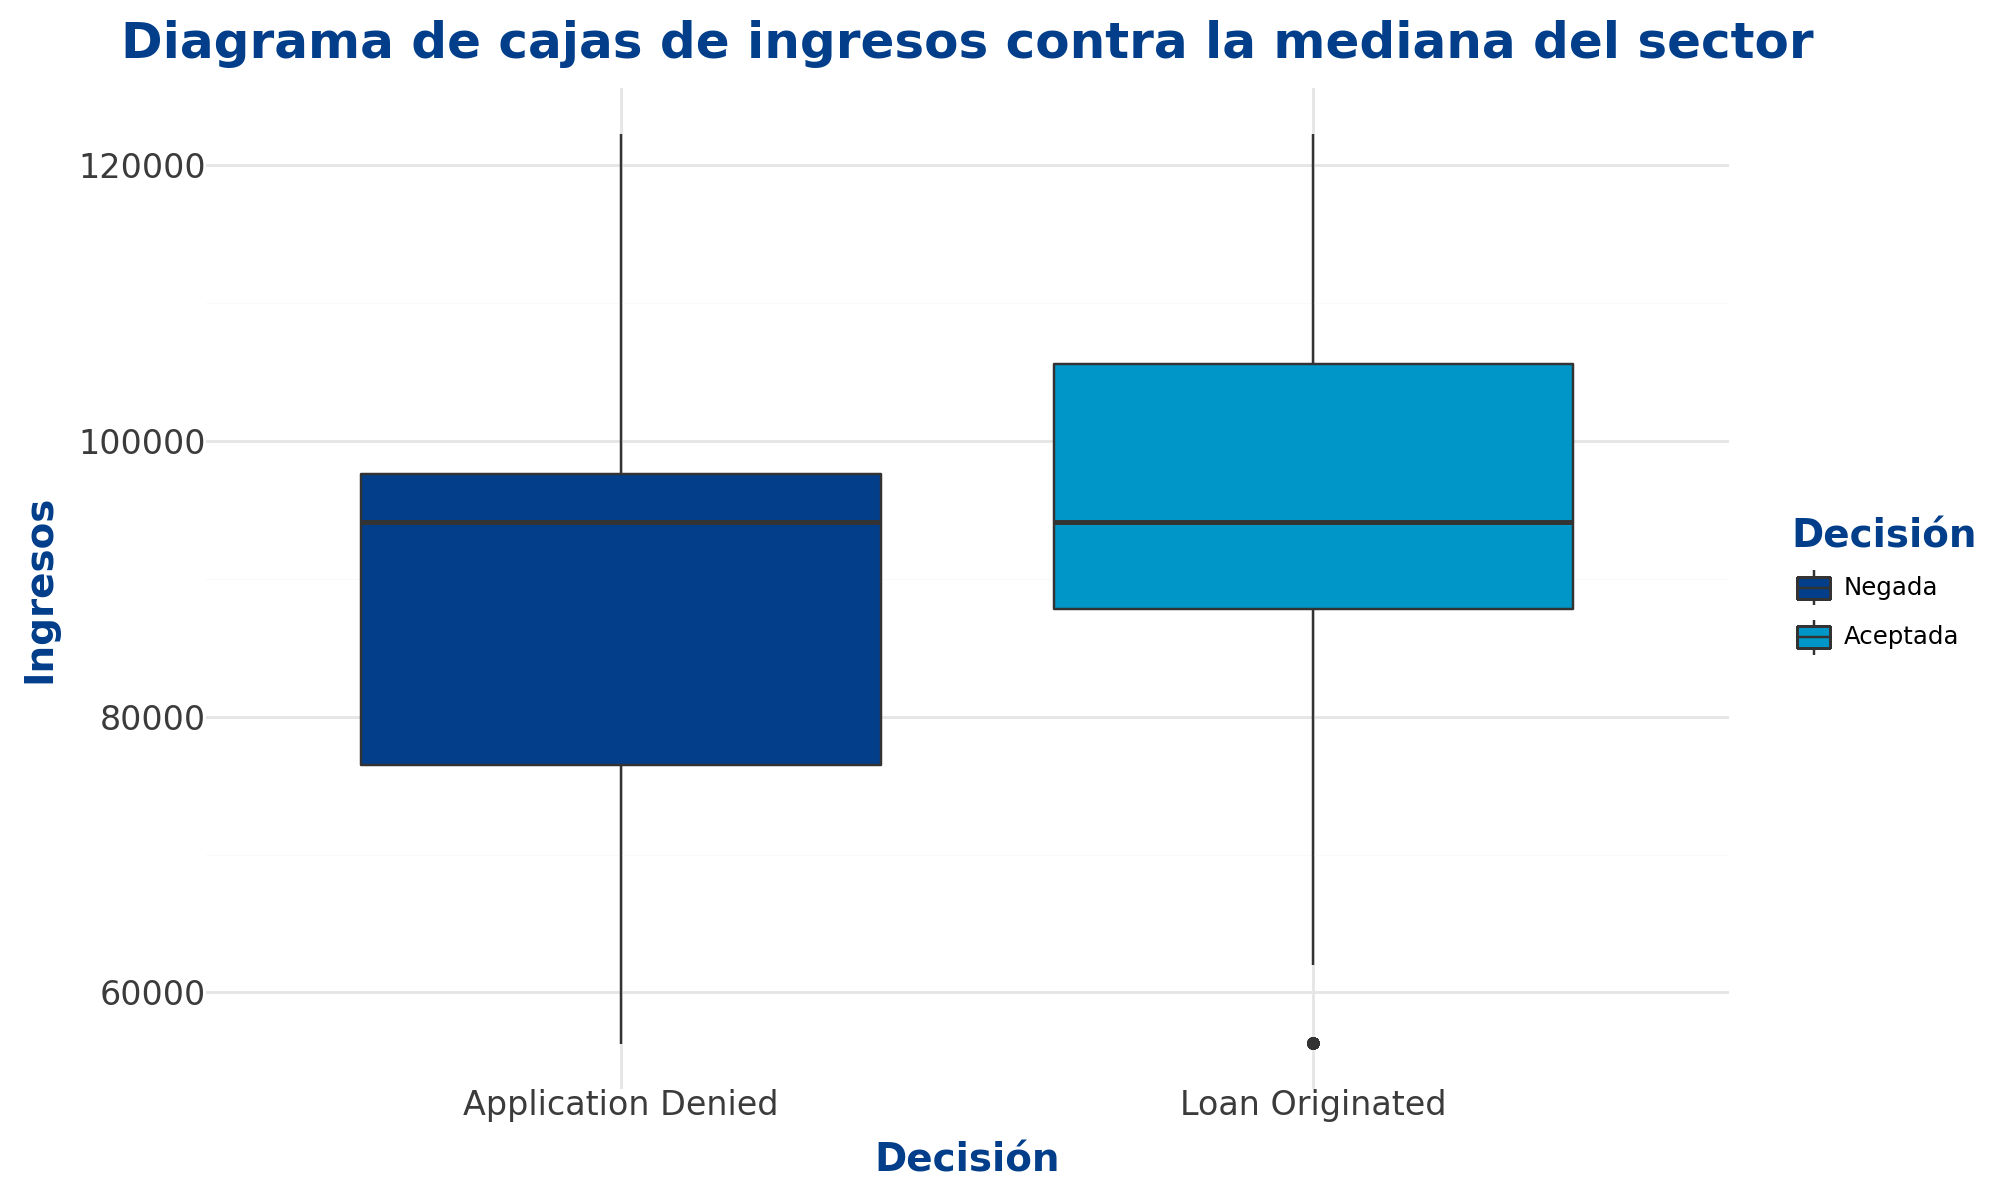

In [369]:
from plotnine import (
    ggplot, aes, geom_boxplot, scale_fill_manual, labs, theme_minimal, theme, element_text
)

blue_palette_median_income = ['#023e8a', '#0096c7']

box_plot_median_income = (
    ggplot(Dataset, aes(x='factor(action_taken)', y='ffiec_median_family_income', fill='factor(action_taken)'))
    + geom_boxplot(show_legend=True)  
    + scale_fill_manual(
        values=blue_palette_median_income,  
        labels=["Negada", "Aceptada"]
    )
    + labs(
        title='Diagrama de cajas de ingresos contra la mediana del sector', 
        x='Decisión', 
        y='Ingresos', 
        fill='Decisión'
    )
    + theme_minimal()  
    + theme(
        figure_size=(10, 6),  
        plot_title=element_text(size=18, weight='bold', ha='center', color='#023e8a'),  
        axis_title_x=element_text(size=14, weight='bold', color='#023e8a'),  
        axis_title_y=element_text(size=14, weight='bold', color='#023e8a'), 
        axis_text=element_text(size=12, color='#3B3B3B'),  
        legend_title=element_text(size=14, weight='bold', color='#023e8a'), 
        legend_position='right',  
        legend_background=element_text(alpha=0),  
        legend_box_margin=0,
        legend_box='vertical' 
    )
)

print(box_plot_median_income)


El diagrama de cajas de ingresos contra la mediana del sector muestra la distribución de los ingresos familiares medianos en el área metropolitana en función de la decisión de aprobación del crédito. Se observa que los préstamos aprobados (`Loan Originated`) tienden a estar asociados con una mediana de ingresos más alta en comparación con los préstamos denegados (`Application Denied`). Los valores medianos son visiblemente mayores para los créditos aprobados, lo que indica que las áreas con mayores ingresos medianos tienden a tener un mayor porcentaje de aprobaciones. Sin embargo, también se aprecia una superposición significativa, lo que sugiere que hay otros factores además de la mediana de ingresos que afectan la decisión de aprobación del crédito.

## **Conclusión**

En el  Análisis Exploratorio de Datos (EDA) realizado ha proporcionado una visión profunda de los datos disponibles para el análisis de aprobación de créditos. Inicialmente, se abordó la imputación de valores faltantes para asegurar la integridad del conjunto de datos, permitiendo un análisis más robusto y evitando sesgos por datos incompletos. Posteriormente, se efectuaron diversos análisis gráficos y pruebas estadísticas, incluyendo pruebas de chi-cuadrado, para evaluar la relación entre variables categóricas y determinar su relevancia.

Asimismo, se llevó a cabo una evaluación de la multicolinealidad mediante el cálculo del Factor de Inflación de la Varianza (VIF), eliminando las variables que presentaban valores altos de VIF para evitar problemas de multicolinealidad en modelos posteriores. También se analizaron la distribución y normalidad de las variables cuantitativas, lo que permitió identificar y tratar valores atípicos que podrían distorsionar el análisis.

Finalmente, las visualizaciones gráficas, como diagramas de cajas, histogramas y gráficos de barras apiladas, ayudaron a comprender mejor la distribución de los datos y la relación entre diferentes variables. Este proceso de limpieza y análisis ha permitido refinar el conjunto de datos, proporcionando una base sólida y confiable para la construcción de modelos predictivos en fases posteriores del análisis.